# Ejercicio 1: Student Grade Prediction Dataset

Este notebook importa y explora el dataset de predicción de calificaciones estudiantiles de Kaggle usando kagglehub.

## 1. Instalar Dependencias Requeridas

Primero instalamos kagglehub y las dependencias adicionales necesarias para el análisis del dataset.

In [2]:
# Instalar kagglehub con soporte para pandas datasets
!pip install kagglehub[pandas-datasets]

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## 2. Importar Librerías

Importamos las librerías necesarias incluyendo kagglehub, pandas, y KaggleDatasetAdapter.

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np

print("Librerías importadas correctamente")

C:\Users\mateo\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Librerías importadas correctamente


## 3. Descargar Dataset de Kaggle

Usamos kagglehub para descargar la última versión del dataset student-grade-prediction y mostramos la ruta a los archivos.

In [4]:
# Descargar la última versión del dataset
path = kagglehub.dataset_download("dipam7/student-grade-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mateo\.cache\kagglehub\datasets\dipam7\student-grade-prediction\versions\1


## 4. Cargar Dataset en DataFrame

Cargamos el dataset en un pandas DataFrame usando KaggleDatasetAdapter con la configuración apropiada de ruta de archivo.

In [5]:
# Primero veamos qué archivos están disponibles
import os
dataset_path = "C:/Users/mateo/.cache/kagglehub/datasets/dipam7/student-grade-prediction/versions/1"
print("Archivos disponibles en el dataset:")
for file in os.listdir(dataset_path):
    print(f"- {file}")

# Intentemos cargar directamente con pandas
import pandas as pd
# Buscar archivos CSV en la carpeta
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
if csv_files:
    print(f"\nCargando archivo CSV: {csv_files[0]}")
    df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
    print("Dataset cargado exitosamente!")
else:
    print("No se encontraron archivos CSV")

Archivos disponibles en el dataset:
- student-mat.csv

Cargando archivo CSV: student-mat.csv
Dataset cargado exitosamente!


## 5. Mostrar Información del Dataset

Mostramos los primeros 5 registros del dataset y información básica sobre la estructura del DataFrame.

In [6]:
# Mostrar los primeros 5 registros
print("First 5 records:")
print(df.head())

print("\n" + "="*50 + "\n")

# Información básica del DataFrame
print("Información básica del DataFrame:")
print(df.info())

First 5 records:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame

## 6. Explorar Estructura del Dataset

Examinamos la forma del dataset, nombres de columnas, tipos de datos, y verificamos valores faltantes para entender la estructura de los datos.

In [7]:
# Forma del dataset
print(f"Forma del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

print("\n" + "="*50 + "\n")

# Nombres de las columnas
print("Nombres de las columnas:")
print(df.columns.tolist())

print("\n" + "="*50 + "\n")

# Tipos de datos
print("Tipos de datos:")
print(df.dtypes)

print("\n" + "="*50 + "\n")

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

print("\n" + "="*50 + "\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df.describe())

Forma del dataset: (395, 33)
Número de filas: 395
Número de columnas: 33


Nombres de las columnas:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Tipos de datos:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc    

# 📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Realizaremos un análisis exploratorio completo incluyendo distribuciones, correlaciones y análisis de subgrupos.

## 7. Importar Librerías para EDA y Visualización

In [4]:
# Librerías para visualización y análisis estadístico
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerías para EDA importadas correctamente")

Librerías para EDA importadas correctamente


## 8. Análisis de Distribuciones de Variables Numéricas

Variables numéricas: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


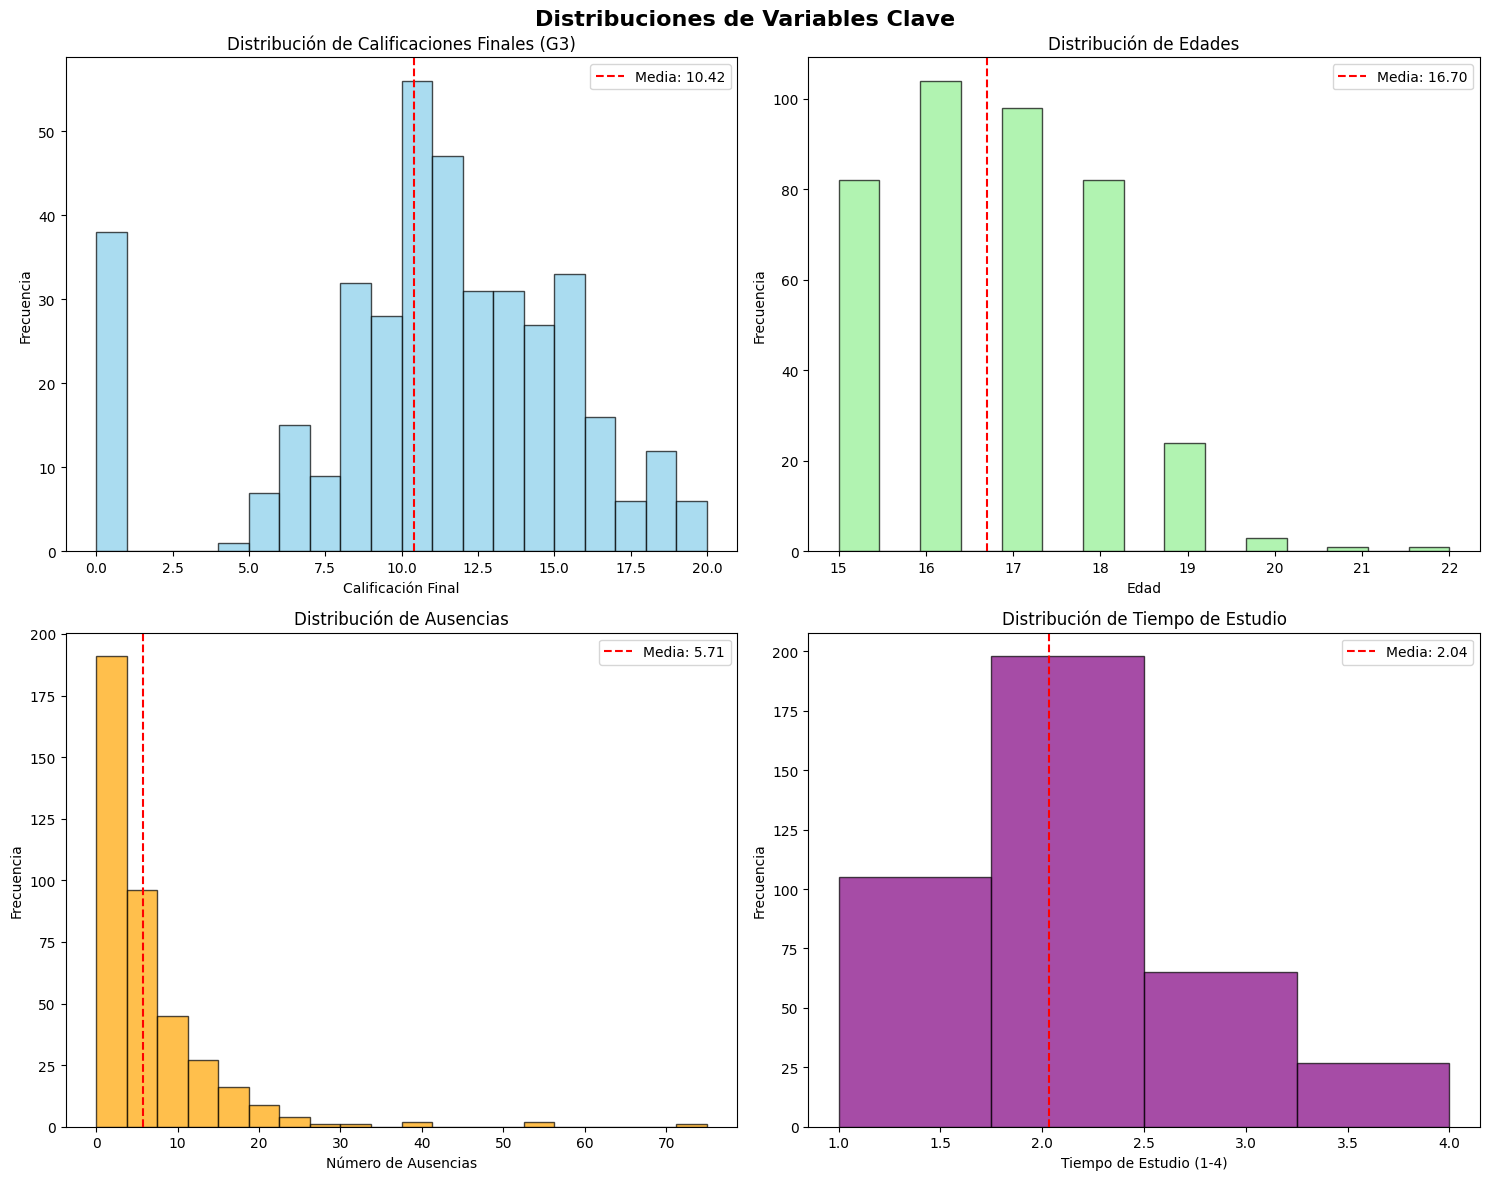


ANÁLISIS DE NORMALIDAD (Test Shapiro-Wilk)
G3: Estadístico = 0.9287, p-valor = 0.000000
  → G3 NO sigue distribución normal

age: Estadístico = 0.9106, p-valor = 0.000000
  → age NO sigue distribución normal

absences: Estadístico = 0.6668, p-valor = 0.000000
  → absences NO sigue distribución normal

studytime: Estadístico = 0.8342, p-valor = 0.000000
  → studytime NO sigue distribución normal



In [5]:
# Identificar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas: {numeric_cols}")

# Crear gráficos de distribución para las variables más importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribuciones de Variables Clave', fontsize=16, fontweight='bold')

# Distribución de calificaciones finales (G3)
axes[0,0].hist(df['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución de Calificaciones Finales (G3)')
axes[0,0].set_xlabel('Calificación Final')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].axvline(df['G3'].mean(), color='red', linestyle='--', label=f'Media: {df["G3"].mean():.2f}')
axes[0,0].legend()

# Distribución de edad
axes[0,1].hist(df['age'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribución de Edades')
axes[0,1].set_xlabel('Edad')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Media: {df["age"].mean():.2f}')
axes[0,1].legend()

# Distribución de ausencias
axes[1,0].hist(df['absences'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].set_title('Distribución de Ausencias')
axes[1,0].set_xlabel('Número de Ausencias')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].axvline(df['absences'].mean(), color='red', linestyle='--', label=f'Media: {df["absences"].mean():.2f}')
axes[1,0].legend()

# Distribución de tiempo de estudio
axes[1,1].hist(df['studytime'], bins=4, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_title('Distribución de Tiempo de Estudio')
axes[1,1].set_xlabel('Tiempo de Estudio (1-4)')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].axvline(df['studytime'].mean(), color='red', linestyle='--', label=f'Media: {df["studytime"].mean():.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Estadísticas de normalidad
print("\n" + "="*60)
print("ANÁLISIS DE NORMALIDAD (Test Shapiro-Wilk)")
print("="*60)
for col in ['G3', 'age', 'absences', 'studytime']:
    stat, p_value = stats.shapiro(df[col])
    print(f"{col}: Estadístico = {stat:.4f}, p-valor = {p_value:.6f}")
    if p_value < 0.05:
        print(f"  → {col} NO sigue distribución normal")
    else:
        print(f"  → {col} sigue distribución normal")
    print()

## 9. Análisis de Variables Categóricas

Variables categóricas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


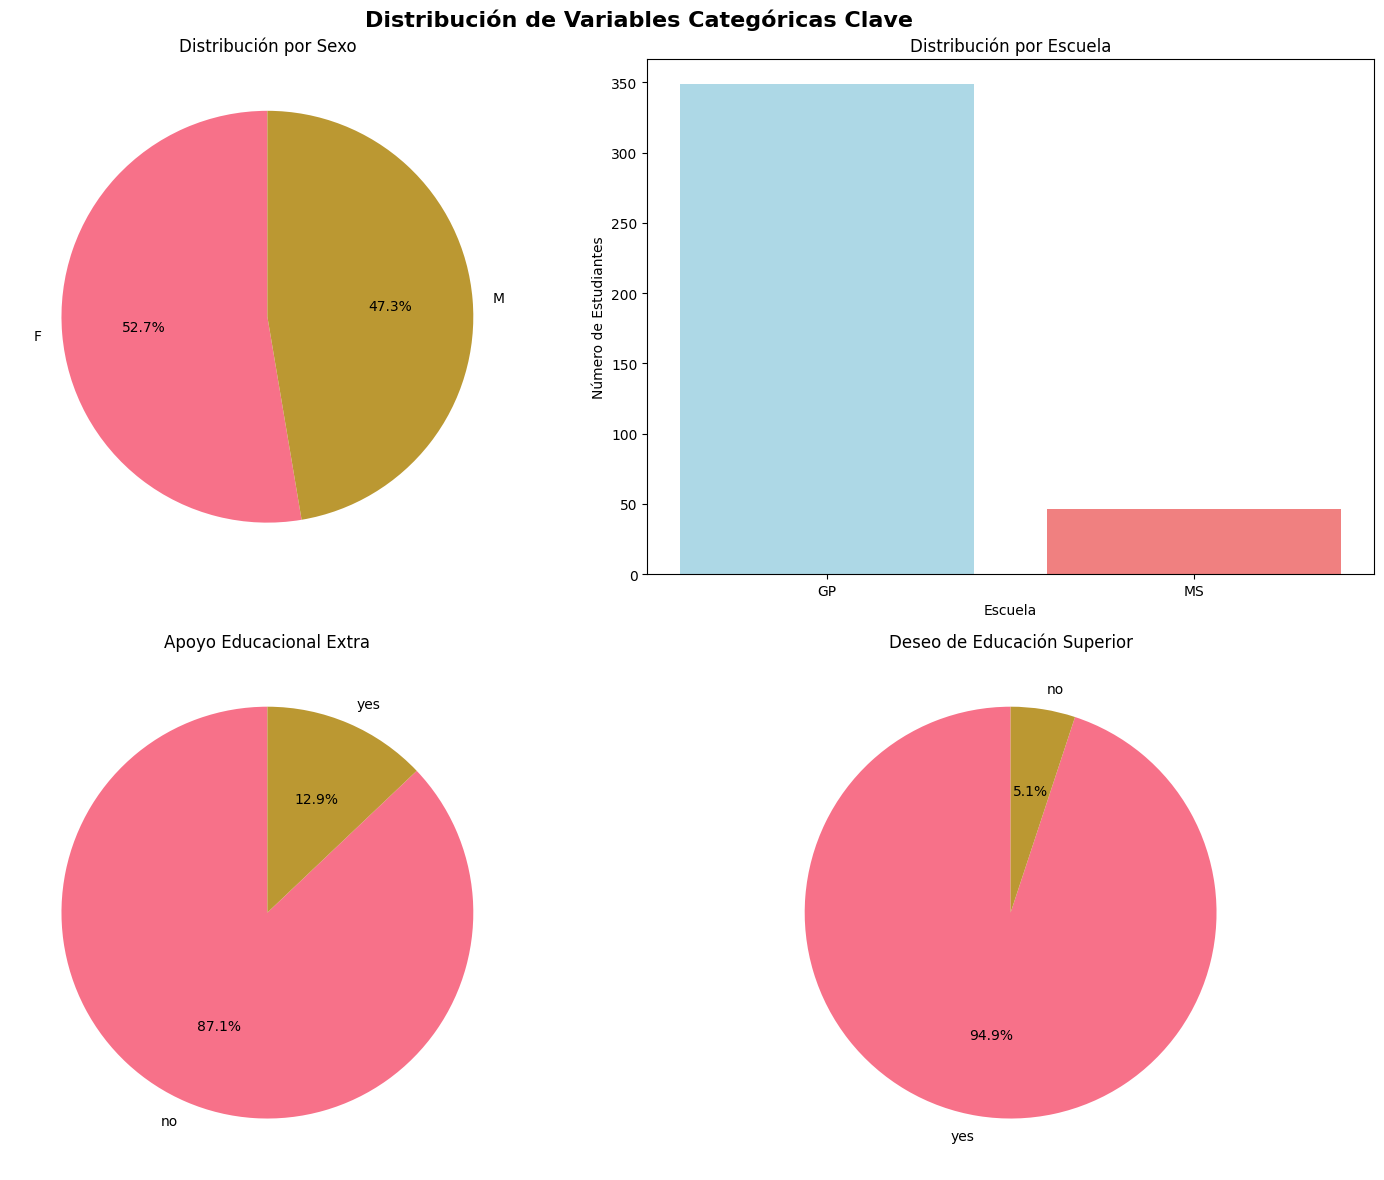


FRECUENCIAS DE VARIABLES CATEGÓRICAS CLAVE

SEX:
  F: 208 (52.7%)
  M: 187 (47.3%)

SCHOOL:
  GP: 349 (88.4%)
  MS: 46 (11.6%)

ADDRESS:
  U: 307 (77.7%)
  R: 88 (22.3%)

FAMSIZE:
  GT3: 281 (71.1%)
  LE3: 114 (28.9%)

SCHOOLSUP:
  no: 344 (87.1%)
  yes: 51 (12.9%)

HIGHER:
  yes: 375 (94.9%)
  no: 20 (5.1%)

INTERNET:
  yes: 329 (83.3%)
  no: 66 (16.7%)

ROMANTIC:
  no: 263 (66.6%)
  yes: 132 (33.4%)


In [6]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas: {categorical_cols}")

# Crear gráficos para variables categóricas importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de Variables Categóricas Clave', fontsize=16, fontweight='bold')

# Distribución por sexo
sex_counts = df['sex'].value_counts()
axes[0,0].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución por Sexo')

# Distribución por escuela
school_counts = df['school'].value_counts()
axes[0,1].bar(school_counts.index, school_counts.values, color=['lightblue', 'lightcoral'])
axes[0,1].set_title('Distribución por Escuela')
axes[0,1].set_xlabel('Escuela')
axes[0,1].set_ylabel('Número de Estudiantes')

# Apoyo educacional extra
schoolsup_counts = df['schoolsup'].value_counts()
axes[1,0].pie(schoolsup_counts.values, labels=schoolsup_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Apoyo Educacional Extra')

# Educación superior deseada
higher_counts = df['higher'].value_counts()
axes[1,1].pie(higher_counts.values, labels=higher_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Deseo de Educación Superior')

plt.tight_layout()
plt.show()

# Análisis detallado de frecuencias
print("\n" + "="*60)
print("FRECUENCIAS DE VARIABLES CATEGÓRICAS CLAVE")
print("="*60)

important_categoricals = ['sex', 'school', 'address', 'famsize', 'schoolsup', 'higher', 'internet', 'romantic']
for col in important_categoricals:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        freq = df[col].value_counts()
        for category, count in freq.items():
            percentage = (count / len(df)) * 100
            print(f"  {category}: {count} ({percentage:.1f}%)")

## 10. Matriz de Correlaciones

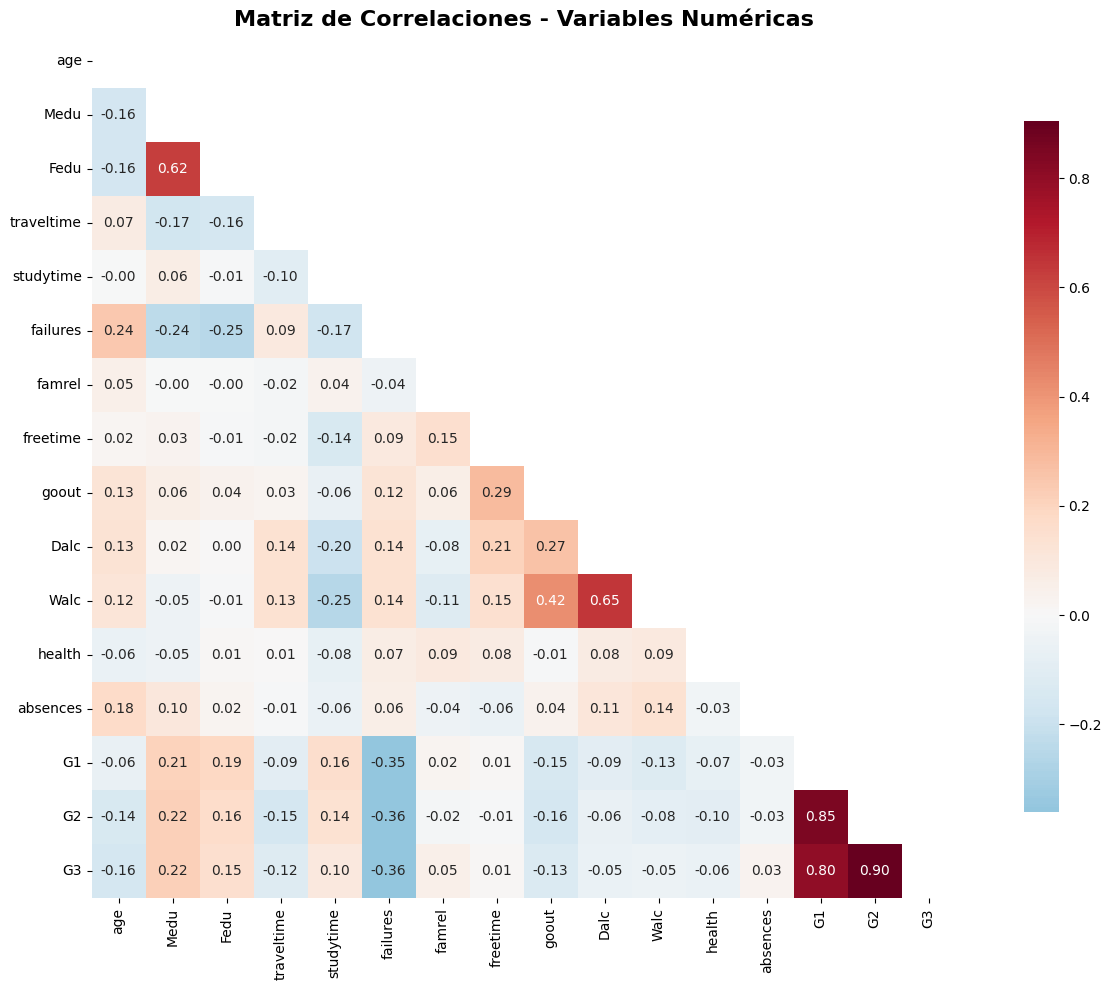


CORRELACIONES MÁS FUERTES CON LA CALIFICACIÓN FINAL (G3)
G2          :  0.905
G1          :  0.801
failures    : -0.360
Medu        :  0.217
age         : -0.162
Fedu        :  0.152
goout       : -0.133
traveltime  : -0.117
studytime   :  0.098
health      : -0.061

CORRELACIONES MUY ALTAS (>0.8) - POSIBLE MULTICOLINEALIDAD
G1 - G2: 0.852
G1 - G3: 0.801
G2 - G3: 0.905


In [7]:
# Calcular matriz de correlación para variables numéricas
correlation_matrix = df[numeric_cols].corr()

# Crear heatmap de correlaciones
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaciones - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con G3 (calificación final)
print("\n" + "="*60)
print("CORRELACIONES MÁS FUERTES CON LA CALIFICACIÓN FINAL (G3)")
print("="*60)
g3_correlations = correlation_matrix['G3'].drop('G3').sort_values(key=abs, ascending=False)
for variable, correlation in g3_correlations.head(10).items():
    print(f"{variable:12}: {correlation:6.3f}")

# Identificar correlaciones muy altas (posible multicolinealidad)
print("\n" + "="*60)
print("CORRELACIONES MUY ALTAS (>0.8) - POSIBLE MULTICOLINEALIDAD")
print("="*60)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_corr_pairs.append((var1, var2, corr_val))
            print(f"{var1} - {var2}: {corr_val:.3f}")

if not high_corr_pairs:
    print("No se encontraron correlaciones muy altas")

## 11. Análisis de Subgrupos

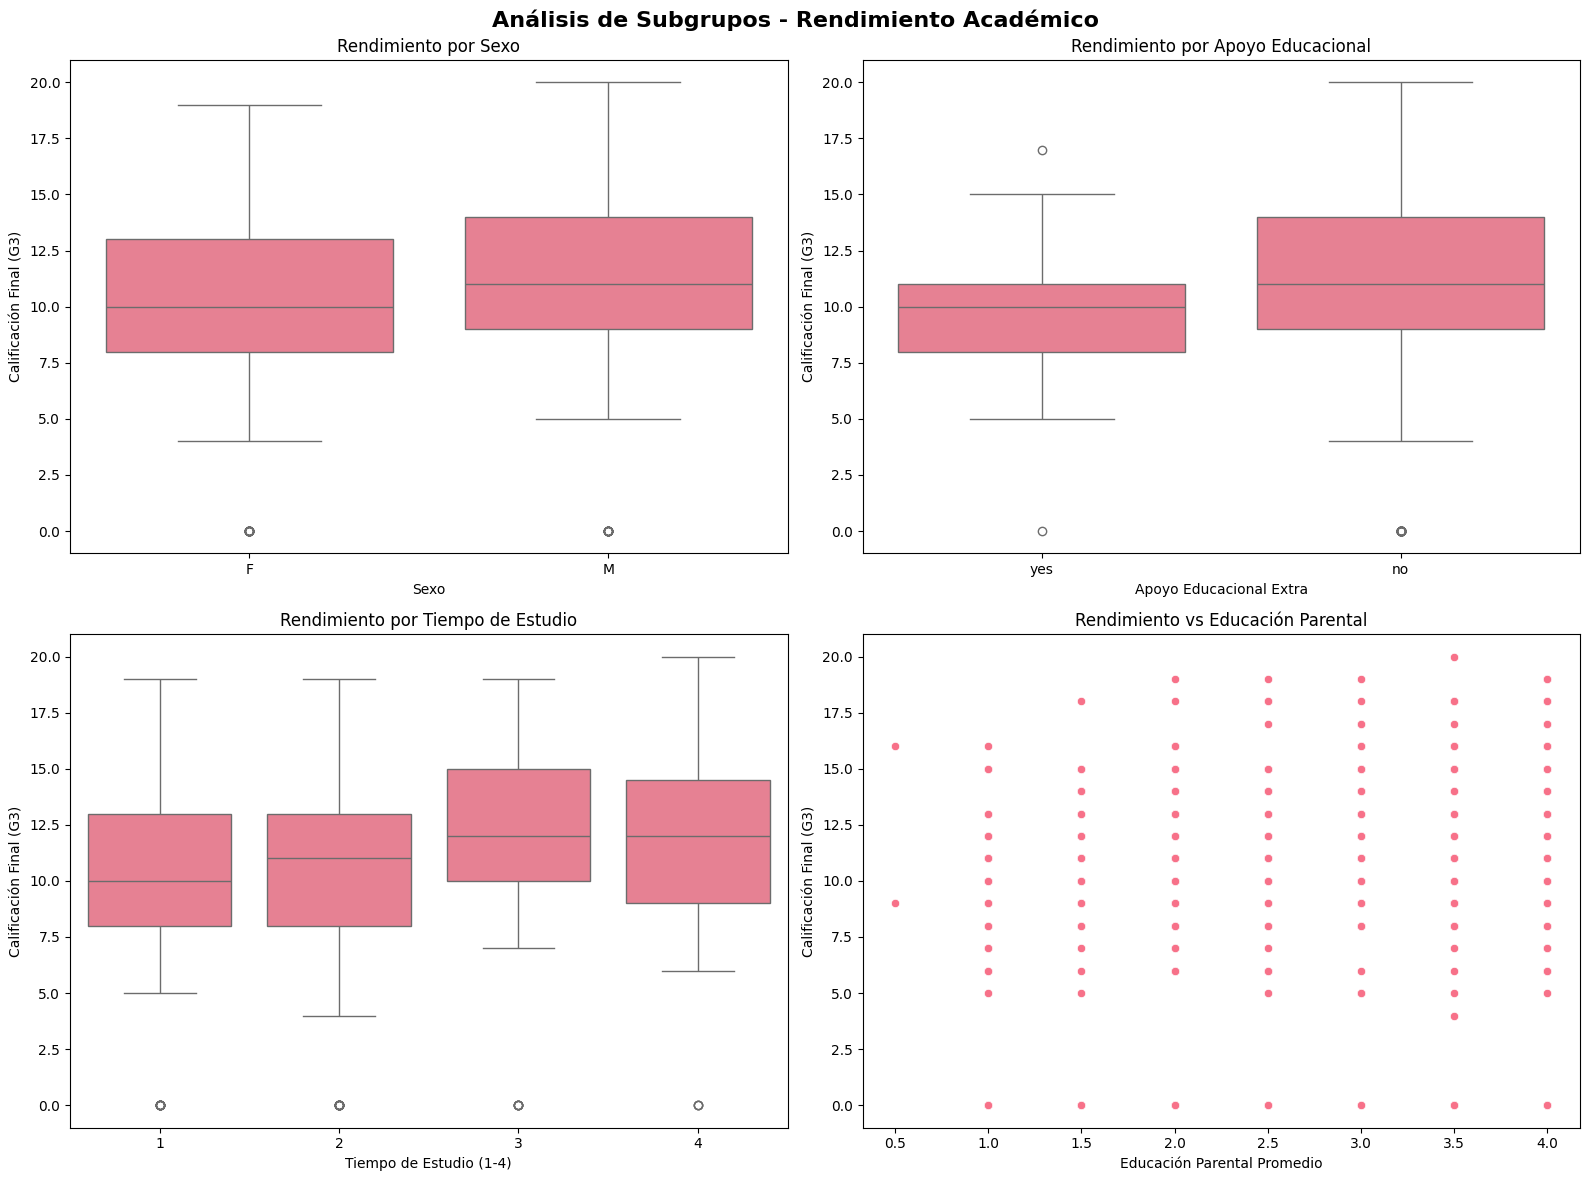


ANÁLISIS ESTADÍSTICO DE DIFERENCIAS ENTRE GRUPOS

Diferencias por SEXO:
  Media Hombres: 10.91
  Media Mujeres: 9.97
  t-statistic: 2.062, p-valor: 0.0399

Diferencias por APOYO EDUCACIONAL:
  Media Con Apoyo: 9.43
  Media Sin Apoyo: 10.56
  t-statistic: -1.647, p-valor: 0.1004

Diferencias por TIEMPO DE ESTUDIO (ANOVA):
  F-statistic: 1.728, p-valor: 0.1607
  Tiempo 1: Media = 10.05
  Tiempo 2: Media = 10.17
  Tiempo 3: Media = 11.40
  Tiempo 4: Media = 11.26


In [8]:
# Análisis de subgrupos: Rendimiento por diferentes características

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Subgrupos - Rendimiento Académico', fontsize=16, fontweight='bold')

# 1. Rendimiento por sexo
sns.boxplot(data=df, x='sex', y='G3', ax=axes[0,0])
axes[0,0].set_title('Rendimiento por Sexo')
axes[0,0].set_xlabel('Sexo')
axes[0,0].set_ylabel('Calificación Final (G3)')

# 2. Rendimiento por apoyo educacional extra
sns.boxplot(data=df, x='schoolsup', y='G3', ax=axes[0,1])
axes[0,1].set_title('Rendimiento por Apoyo Educacional')
axes[0,1].set_xlabel('Apoyo Educacional Extra')
axes[0,1].set_ylabel('Calificación Final (G3)')

# 3. Rendimiento por tiempo de estudio
sns.boxplot(data=df, x='studytime', y='G3', ax=axes[1,0])
axes[1,0].set_title('Rendimiento por Tiempo de Estudio')
axes[1,0].set_xlabel('Tiempo de Estudio (1-4)')
axes[1,0].set_ylabel('Calificación Final (G3)')

# 4. Rendimiento por educación de los padres (promedio)
df['parent_edu'] = (df['Medu'] + df['Fedu']) / 2
sns.scatterplot(data=df, x='parent_edu', y='G3', ax=axes[1,1])
axes[1,1].set_title('Rendimiento vs Educación Parental')
axes[1,1].set_xlabel('Educación Parental Promedio')
axes[1,1].set_ylabel('Calificación Final (G3)')

plt.tight_layout()
plt.show()

# Análisis estadístico de diferencias entre grupos
print("\n" + "="*60)
print("ANÁLISIS ESTADÍSTICO DE DIFERENCIAS ENTRE GRUPOS")
print("="*60)

# Test t para diferencias por sexo
male_grades = df[df['sex'] == 'M']['G3']
female_grades = df[df['sex'] == 'F']['G3']
t_stat, p_val = stats.ttest_ind(male_grades, female_grades)
print(f"\nDiferencias por SEXO:")
print(f"  Media Hombres: {male_grades.mean():.2f}")
print(f"  Media Mujeres: {female_grades.mean():.2f}")
print(f"  t-statistic: {t_stat:.3f}, p-valor: {p_val:.4f}")

# Test t para diferencias por apoyo educacional
sup_yes = df[df['schoolsup'] == 'yes']['G3']
sup_no = df[df['schoolsup'] == 'no']['G3']
t_stat, p_val = stats.ttest_ind(sup_yes, sup_no)
print(f"\nDiferencias por APOYO EDUCACIONAL:")
print(f"  Media Con Apoyo: {sup_yes.mean():.2f}")
print(f"  Media Sin Apoyo: {sup_no.mean():.2f}")
print(f"  t-statistic: {t_stat:.3f}, p-valor: {p_val:.4f}")

# ANOVA para tiempo de estudio
study_groups = [df[df['studytime'] == i]['G3'] for i in range(1, 5)]
f_stat, p_val = stats.f_oneway(*study_groups)
print(f"\nDiferencias por TIEMPO DE ESTUDIO (ANOVA):")
print(f"  F-statistic: {f_stat:.3f}, p-valor: {p_val:.4f}")
for i in range(1, 5):
    mean_grade = df[df['studytime'] == i]['G3'].mean()
    print(f"  Tiempo {i}: Media = {mean_grade:.2f}")

# 🔧 PREPROCESAMIENTO DE DATOS

Implementaremos un preprocesamiento completo incluyendo imputación, estandarización y codificación de variables.

## 12. Importar Librerías para Preprocesamiento

In [9]:
# Librerías para preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import copy

print("Librerías para preprocesamiento importadas correctamente")

Librerías para preprocesamiento importadas correctamente


## 13. Preparación de Datos y Detección de Outliers

DETECCIÓN DE OUTLIERS
age:
  Límites: [13.00, 21.00]
  Outliers: 1 (0.3%)

absences:
  Límites: [-12.00, 20.00]
  Outliers: 15 (3.8%)

G1:
  Límites: [0.50, 20.50]
  Outliers: 0 (0.0%)

G2:
  Límites: [3.00, 19.00]
  Outliers: 13 (3.3%)

G3:
  Límites: [-1.00, 23.00]
  Outliers: 0 (0.0%)



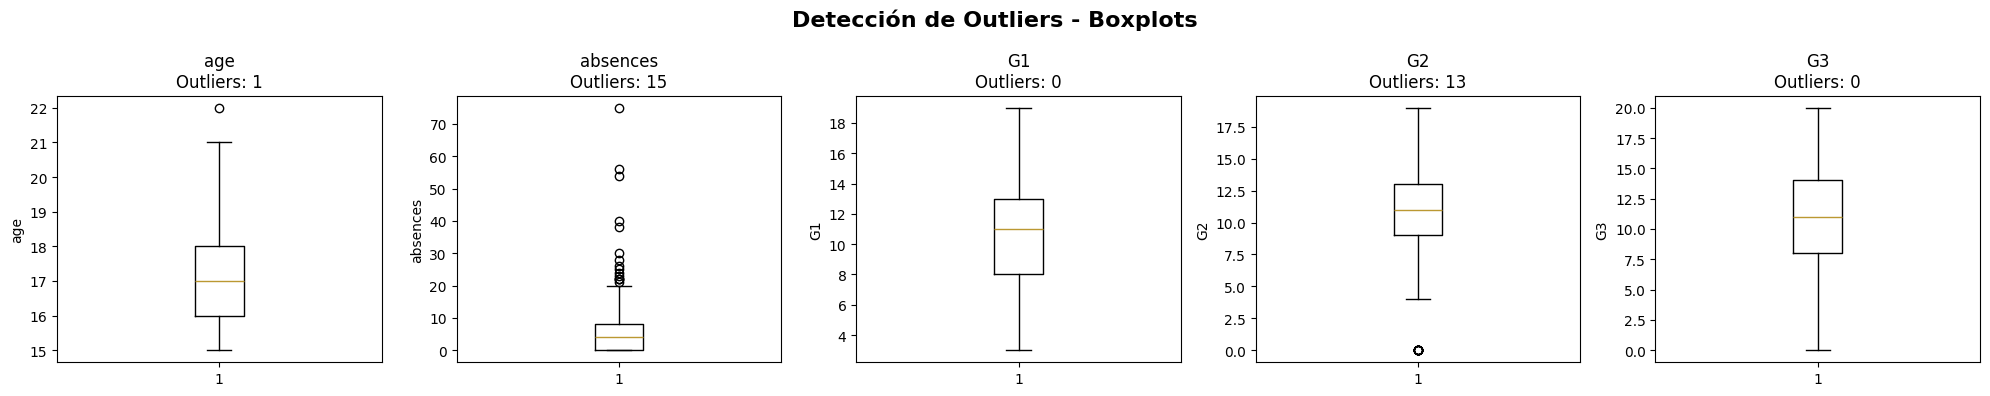


VERIFICACIÓN DE VALORES FALTANTES
✅ No hay valores faltantes en el dataset

ESTADÍSTICAS GENERALES DEL DATASET
Número total de registros: 395
Número total de variables: 34
Variables numéricas: 17
Variables categóricas: 17


In [10]:
# Crear copia del dataset original
df_processed = df.copy()

# 1. DETECCIÓN DE OUTLIERS
print("="*60)
print("DETECCIÓN DE OUTLIERS")
print("="*60)

# Método IQR para detectar outliers en variables numéricas principales
outlier_vars = ['age', 'absences', 'G1', 'G2', 'G3']

fig, axes = plt.subplots(1, len(outlier_vars), figsize=(20, 4))
fig.suptitle('Detección de Outliers - Boxplots', fontsize=16, fontweight='bold')

outliers_info = {}

for i, var in enumerate(outlier_vars):
    # Calcular IQR
    Q1 = df_processed[var].quantile(0.25)
    Q3 = df_processed[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df_processed[(df_processed[var] < lower_bound) | (df_processed[var] > upper_bound)]
    outliers_info[var] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df_processed)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    # Crear boxplot
    axes[i].boxplot(df_processed[var])
    axes[i].set_title(f'{var}\nOutliers: {len(outliers)}')
    axes[i].set_ylabel(var)
    
    print(f"{var}:")
    print(f"  Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({(len(outliers)/len(df_processed))*100:.1f}%)")
    print()

plt.tight_layout()
plt.show()

# 2. VERIFICAR VALORES FALTANTES (aunque ya sabemos que no hay)
print("\n" + "="*60)
print("VERIFICACIÓN DE VALORES FALTANTES")
print("="*60)
missing_values = df_processed.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No hay valores faltantes en el dataset")
else:
    print("Valores faltantes por columna:")
    for col, count in missing_values[missing_values > 0].items():
        print(f"  {col}: {count}")

# 3. ESTADÍSTICAS GENERALES
print("\n" + "="*60)
print("ESTADÍSTICAS GENERALES DEL DATASET")
print("="*60)
print(f"Número total de registros: {len(df_processed)}")
print(f"Número total de variables: {len(df_processed.columns)}")
print(f"Variables numéricas: {len(df_processed.select_dtypes(include=[np.number]).columns)}")
print(f"Variables categóricas: {len(df_processed.select_dtypes(include=['object']).columns)}")

## 14. Codificación de Variables Categóricas

In [11]:
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS

print("="*60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("="*60)

# Separar variables categóricas por tipo de codificación
binary_vars = []  # Variables binarias (2 categorías)
multi_vars = []   # Variables con múltiples categorías

for col in categorical_cols:
    unique_values = df_processed[col].nunique()
    print(f"{col}: {unique_values} categorías únicas - {df_processed[col].unique()}")
    if unique_values == 2:
        binary_vars.append(col)
    else:
        multi_vars.append(col)

print(f"\nVariables binarias (Label Encoding): {binary_vars}")
print(f"Variables multicategoría (One-Hot Encoding): {multi_vars}")

# 1. LABEL ENCODING para variables binarias
print(f"\n1. APLICANDO LABEL ENCODING...")
label_encoders = {}
for col in binary_vars:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"   {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 2. ONE-HOT ENCODING para variables multicategoría
print(f"\n2. APLICANDO ONE-HOT ENCODING...")
df_encoded = df_processed.copy()

for col in multi_vars:
    # Crear variables dummy
    dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    print(f"   {col}: Creadas {len(dummies.columns)} variables dummy")

# Eliminar variables categóricas originales del dataset procesado
df_encoded = df_encoded.drop(columns=categorical_cols)

# 3. MOSTRAR RESULTADO
print(f"\n3. RESULTADO DE LA CODIFICACIÓN:")
print(f"   Dataset original: {df.shape}")
print(f"   Dataset codificado: {df_encoded.shape}")
print(f"   Nuevas variables creadas: {df_encoded.shape[1] - df.select_dtypes(include=[np.number]).shape[1]}")

print(f"\nPrimeras columnas del dataset codificado:")
print(df_encoded.columns.tolist()[:15])

# Verificar que no queden variables categóricas
remaining_categorical = df_encoded.select_dtypes(include=['object']).columns
if len(remaining_categorical) == 0:
    print(f"\n✅ Todas las variables categóricas han sido codificadas exitosamente")
else:
    print(f"\n⚠️  Variables categóricas restantes: {remaining_categorical.tolist()}")

# Mostrar una muestra del dataset codificado
print(f"\nMuestra del dataset codificado:")
print(df_encoded.head())

CODIFICACIÓN DE VARIABLES CATEGÓRICAS
school: 2 categorías únicas - ['GP' 'MS']
sex: 2 categorías únicas - ['F' 'M']
address: 2 categorías únicas - ['U' 'R']
famsize: 2 categorías únicas - ['GT3' 'LE3']
Pstatus: 2 categorías únicas - ['A' 'T']
Mjob: 5 categorías únicas - ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: 5 categorías únicas - ['teacher' 'other' 'services' 'health' 'at_home']
reason: 4 categorías únicas - ['course' 'other' 'home' 'reputation']
guardian: 3 categorías únicas - ['mother' 'father' 'other']
schoolsup: 2 categorías únicas - ['yes' 'no']
famsup: 2 categorías únicas - ['no' 'yes']
paid: 2 categorías únicas - ['no' 'yes']
activities: 2 categorías únicas - ['no' 'yes']
nursery: 2 categorías únicas - ['yes' 'no']
higher: 2 categorías únicas - ['yes' 'no']
internet: 2 categorías únicas - ['no' 'yes']
romantic: 2 categorías únicas - ['no' 'yes']

Variables binarias (Label Encoding): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid

## 15. Estandarización de Variables Numéricas

ESTANDARIZACIÓN DE VARIABLES NUMÉRICAS
Variables a estandarizar: 27
Variables objetivo (no estandarizar): ['G1', 'G2', 'G3']

Forma de X (features): (395, 27)
Forma de y (target): (395,)

Estadísticas ANTES de la estandarización (primeras 5 variables):
              age        Medu        Fedu  traveltime   studytime
count  395.000000  395.000000  395.000000  395.000000  395.000000
mean    16.696203    2.749367    2.521519    1.448101    2.035443
std      1.276043    1.094735    1.088201    0.697505    0.839240
min     15.000000    0.000000    0.000000    1.000000    1.000000
25%     16.000000    2.000000    2.000000    1.000000    1.000000
50%     17.000000    3.000000    2.000000    1.000000    2.000000
75%     18.000000    4.000000    3.000000    2.000000    2.000000
max     22.000000    4.000000    4.000000    4.000000    4.000000

Estadísticas DESPUÉS de la estandarización (primeras 5 variables):
                age          Medu          Fedu    traveltime     studytime
count  3.

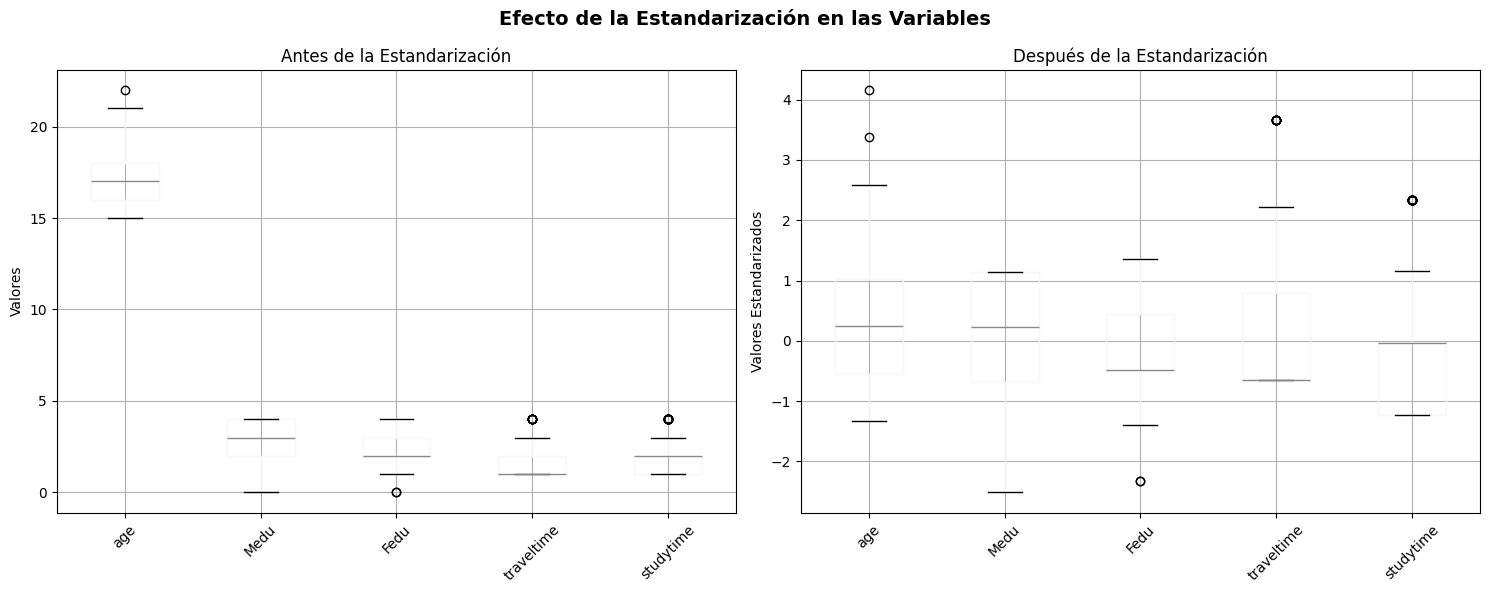


✅ Estandarización completada exitosamente
Dataset final para modelado: 395 muestras, 27 características


In [12]:
# ESTANDARIZACIÓN DE VARIABLES NUMÉRICAS

print("="*60)
print("ESTANDARIZACIÓN DE VARIABLES NUMÉRICAS")
print("="*60)

# Identificar variables numéricas en el dataset codificado
numeric_cols_encoded = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Separar variables objetivo (G1, G2, G3) de las features
target_vars = ['G1', 'G2', 'G3']
feature_vars = [col for col in numeric_cols_encoded if col not in target_vars]

print(f"Variables a estandarizar: {len(feature_vars)}")
print(f"Variables objetivo (no estandarizar): {target_vars}")

# Crear dataset final separando features y targets
X = df_encoded[feature_vars].copy()
y = df_encoded['G3'].copy()  # Usamos G3 como variable objetivo principal
y_all = df_encoded[target_vars].copy()  # Guardamos todas las calificaciones

print(f"\nForma de X (features): {X.shape}")
print(f"Forma de y (target): {y.shape}")

# Estadísticas antes de la estandarización
print(f"\nEstadísticas ANTES de la estandarización (primeras 5 variables):")
print(X.iloc[:, :5].describe())

# Aplicar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Estadísticas después de la estandarización
print(f"\nEstadísticas DESPUÉS de la estandarización (primeras 5 variables):")
print(X_scaled_df.iloc[:, :5].describe())

# Verificar la estandarización (media ≈ 0, std ≈ 1)
print(f"\nVerificación de la estandarización:")
print(f"Media promedio: {X_scaled_df.mean().mean():.6f} (debería ser ≈ 0)")
print(f"Desviación estándar promedio: {X_scaled_df.std().mean():.6f} (debería ser ≈ 1)")

# Visualización del efecto de la estandarización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Antes de la estandarización
X.iloc[:, :5].boxplot(ax=ax1)
ax1.set_title('Antes de la Estandarización')
ax1.set_ylabel('Valores')
ax1.tick_params(axis='x', rotation=45)

# Después de la estandarización
X_scaled_df.iloc[:, :5].boxplot(ax=ax2)
ax2.set_title('Después de la Estandarización')
ax2.set_ylabel('Valores Estandarizados')
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('Efecto de la Estandarización en las Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✅ Estandarización completada exitosamente")
print(f"Dataset final para modelado: {X_scaled_df.shape[0]} muestras, {X_scaled_df.shape[1]} características")

## 16. División de Datos y Resumen Final

In [13]:
# DIVISIÓN DE DATOS Y RESUMEN FINAL DEL PREPROCESAMIENTO

print("="*70)
print("DIVISIÓN DE DATOS PARA ENTRENAMIENTO Y PRUEBA")
print("="*70)

# División de datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None  # No stratify para regresión
)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")
print(f"Distribución: {len(X_train)/(len(X_train)+len(X_test))*100:.1f}% entrenamiento, {len(X_test)/(len(X_train)+len(X_test))*100:.1f}% prueba")

# Estadísticas de la variable objetivo en ambos conjuntos
print(f"\nEstadísticas de la variable objetivo (G3):")
print(f"Entrenamiento - Media: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Prueba - Media: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

print("\n" + "="*70)
print("RESUMEN COMPLETO DEL PREPROCESAMIENTO")
print("="*70)

preprocessing_summary = {
    "Dataset Original": {
        "Registros": len(df),
        "Variables": len(df.columns),
        "Variables Numéricas": len(df.select_dtypes(include=[np.number]).columns),
        "Variables Categóricas": len(df.select_dtypes(include=['object']).columns),
        "Valores Faltantes": df.isnull().sum().sum()
    },
    "Después del Preprocesamiento": {
        "Registros": len(X_scaled_df),
        "Características (Features)": X_scaled_df.shape[1],
        "Variables Objetivo": len(target_vars),
        "Valores Faltantes": 0,
        "Todas Numéricas": "✅"
    },
    "Transformaciones Aplicadas": {
        "Codificación Label": f"{len(binary_vars)} variables binarias",
        "Codificación One-Hot": f"{len(multi_vars)} variables multicategoría",
        "Estandarización": f"{len(feature_vars)} características numéricas",
        "División Datos": "80% entrenamiento, 20% prueba"
    }
}

for section, items in preprocessing_summary.items():
    print(f"\n{section}:")
    for key, value in items.items():
        print(f"  • {key}: {value}")

# Guardar información importante para uso posterior
preprocessing_info = {
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': X.columns.tolist(),
    'target_column': 'G3',
    'original_shape': df.shape,
    'processed_shape': X_scaled_df.shape
}

print(f"\n✅ PREPROCESAMIENTO COMPLETADO EXITOSAMENTE")
print(f"Los datos están listos para el entrenamiento de modelos de machine learning")

# Mostrar las primeras filas de los datos procesados
print(f"\nPrimeras 3 filas del conjunto de entrenamiento:")
print(X_train.head(3))
print(f"\nPrimeros 3 valores de la variable objetivo:")
print(y_train.head(3).tolist())

DIVISIÓN DE DATOS PARA ENTRENAMIENTO Y PRUEBA
Conjunto de entrenamiento: (316, 27)
Conjunto de prueba: (79, 27)
Distribución: 80.0% entrenamiento, 20.0% prueba

Estadísticas de la variable objetivo (G3):
Entrenamiento - Media: 10.33, Std: 4.59
Prueba - Media: 10.77, Std: 4.56

RESUMEN COMPLETO DEL PREPROCESAMIENTO

Dataset Original:
  • Registros: 395
  • Variables: 34
  • Variables Numéricas: 17
  • Variables Categóricas: 17
  • Valores Faltantes: 0

Después del Preprocesamiento:
  • Registros: 395
  • Características (Features): 27
  • Variables Objetivo: 3
  • Valores Faltantes: 0
  • Todas Numéricas: ✅

Transformaciones Aplicadas:
  • Codificación Label: 13 variables binarias
  • Codificación One-Hot: 4 variables multicategoría
  • Estandarización: 27 características numéricas
  • División Datos: 80% entrenamiento, 20% prueba

✅ PREPROCESAMIENTO COMPLETADO EXITOSAMENTE
Los datos están listos para el entrenamiento de modelos de machine learning

Primeras 3 filas del conjunto de entr

# 🤖 MODELOS PREDICTIVOS DE RENDIMIENTO ACADÉMICO

Construiremos modelos supervisados para predecir el nivel de rendimiento académico ("alto", "medio", "bajo") basado en los factores analizados.

## 17. Creación de Variable Objetivo Categórica

CREACIÓN DE VARIABLE OBJETIVO CATEGÓRICA
Estadísticas de G3:
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

Distribución de clases de rendimiento:
  Bajo: 186 estudiantes (47.1%)
  Medio: 136 estudiantes (34.4%)
  Alto: 73 estudiantes (18.5%)


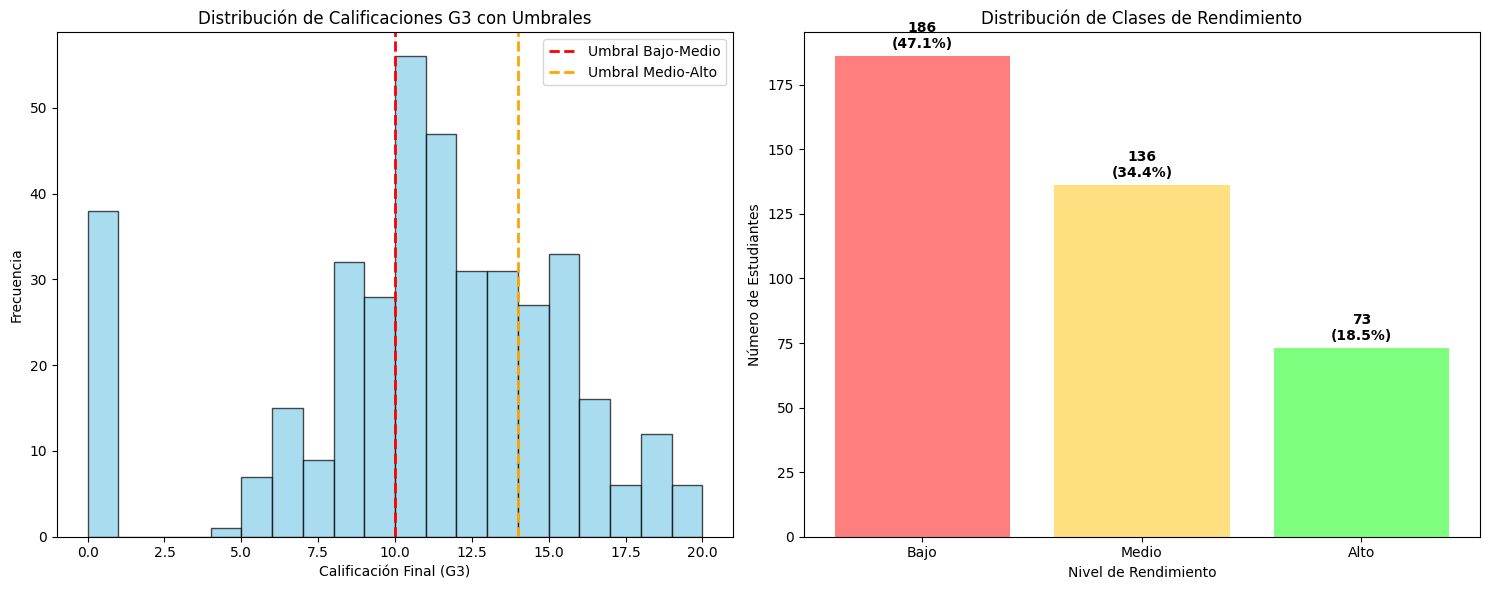


DIVISIÓN ESTRATIFICADA DE DATOS
Conjunto de entrenamiento: (316, 30)
Conjunto de prueba: (79, 30)

Distribución en conjunto de entrenamiento:
  Bajo: 149 (47.2%)
  Medio: 109 (34.5%)
  Alto: 58 (18.4%)

Distribución en conjunto de prueba:
  Bajo: 37 (46.8%)
  Medio: 27 (34.2%)
  Alto: 15 (19.0%)

✅ Variable objetivo categórica creada exitosamente
Problema de clasificación de 3 clases balanceado y listo para modelado


In [14]:
# CREAR VARIABLE OBJETIVO CATEGÓRICA PARA CLASIFICACIÓN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("="*70)
print("CREACIÓN DE VARIABLE OBJETIVO CATEGÓRICA")
print("="*70)

# Usar la calificación final G3 para crear categorías de rendimiento
# Analizar distribución de G3 para definir umbrales
g3_stats = df['G3'].describe()
print(f"Estadísticas de G3:")
print(g3_stats)

# Definir umbrales basados en cuartiles y contexto académico
# Bajo: 0-10 (suspenso/deficiente)
# Medio: 11-14 (aprobado/bueno) 
# Alto: 15-20 (notable/sobresaliente)

def classify_performance(grade):
    if grade <= 10:
        return 'Bajo'
    elif grade <= 14:
        return 'Medio'
    else:
        return 'Alto'

# Aplicar clasificación
y_categorical = df['G3'].apply(classify_performance)

# Mostrar distribución de clases
class_distribution = y_categorical.value_counts()
class_percentages = y_categorical.value_counts(normalize=True) * 100

print(f"\nDistribución de clases de rendimiento:")
for class_name in ['Bajo', 'Medio', 'Alto']:
    count = class_distribution.get(class_name, 0)
    percentage = class_percentages.get(class_name, 0)
    print(f"  {class_name}: {count} estudiantes ({percentage:.1f}%)")

# Visualizar distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de G3 con umbrales
ax1.hist(df['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Umbral Bajo-Medio')
ax1.axvline(x=14, color='orange', linestyle='--', linewidth=2, label='Umbral Medio-Alto')
ax1.set_title('Distribución de Calificaciones G3 con Umbrales')
ax1.set_xlabel('Calificación Final (G3)')
ax1.set_ylabel('Frecuencia')
ax1.legend()

# Gráfico de barras de clases
colors = ['#ff7f7f', '#ffdf7f', '#7fff7f']  # Rojo, Amarillo, Verde
bars = ax2.bar(class_distribution.index, class_distribution.values, color=colors)
ax2.set_title('Distribución de Clases de Rendimiento')
ax2.set_xlabel('Nivel de Rendimiento')
ax2.set_ylabel('Número de Estudiantes')

# Añadir etiquetas con porcentajes
for i, bar in enumerate(bars):
    height = bar.get_height()
    class_name = class_distribution.index[i]
    percentage = class_percentages[class_name]
    ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{int(height)}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Preparar datos para machine learning
# Seleccionar características (todas excepto las calificaciones G1, G2, G3)
feature_cols = [col for col in df.columns if col not in ['G1', 'G2', 'G3']]
X = df[feature_cols].copy()

# Codificar variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Crear conjuntos de entrenamiento y prueba con la nueva variable objetivo
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_scaled_df, y_categorical, 
    test_size=0.2, 
    random_state=42,
    stratify=y_categorical  # Mantener proporción de clases
)

print(f"\n" + "="*70)
print("DIVISIÓN ESTRATIFICADA DE DATOS")
print("="*70)
print(f"Conjunto de entrenamiento: {X_train_clf.shape}")
print(f"Conjunto de prueba: {X_test_clf.shape}")

print(f"\nDistribución en conjunto de entrenamiento:")
train_dist = y_train_clf.value_counts()
for class_name in ['Bajo', 'Medio', 'Alto']:
    count = train_dist.get(class_name, 0)
    percentage = (count / len(y_train_clf)) * 100
    print(f"  {class_name}: {count} ({percentage:.1f}%)")

print(f"\nDistribución en conjunto de prueba:")
test_dist = y_test_clf.value_counts()
for class_name in ['Bajo', 'Medio', 'Alto']:
    count = test_dist.get(class_name, 0)
    percentage = (count / len(y_test_clf)) * 100
    print(f"  {class_name}: {count} ({percentage:.1f}%)")

print(f"\n✅ Variable objetivo categórica creada exitosamente")
print(f"Problema de clasificación de 3 clases balanceado y listo para modelado")

## 18. Importar Librerías para Modelos de Machine Learning

In [12]:
# IMPORTAR LIBRERÍAS PARA MODELOS DE MACHINE LEARNING

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Métricas de evaluación
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Validación cruzada y optimización
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Visualización de datos
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("✅ Librerías para modelos de ML importadas correctamente")
print("\nModelos a implementar:")
print("1. 📊 Regresión Logística")
print("2. 👥 K-Nearest Neighbors (KNN)")  
print("3. 🌳 Random Forest")
print("\nMétricas de evaluación:")
print("• Accuracy")
print("• F1-Score")
print("• Precision") 
print("• Recall")

✅ Librerías para modelos de ML importadas correctamente

Modelos a implementar:
1. 📊 Regresión Logística
2. 👥 K-Nearest Neighbors (KNN)
3. 🌳 Random Forest

Métricas de evaluación:
• Accuracy
• F1-Score
• Precision
• Recall


## 19. Visualización de Datos con PCA y t-SNE

REDUCCIÓN DE DIMENSIONALIDAD Y VISUALIZACIÓN
1. Aplicando PCA...
   Varianza explicada por PC1: 0.103 (10.3%)
   Varianza explicada por PC2: 0.083 (8.3%)
   Varianza total explicada: 0.186 (18.6%)

2. Aplicando t-SNE...
   t-SNE completado exitosamente
   t-SNE completado exitosamente


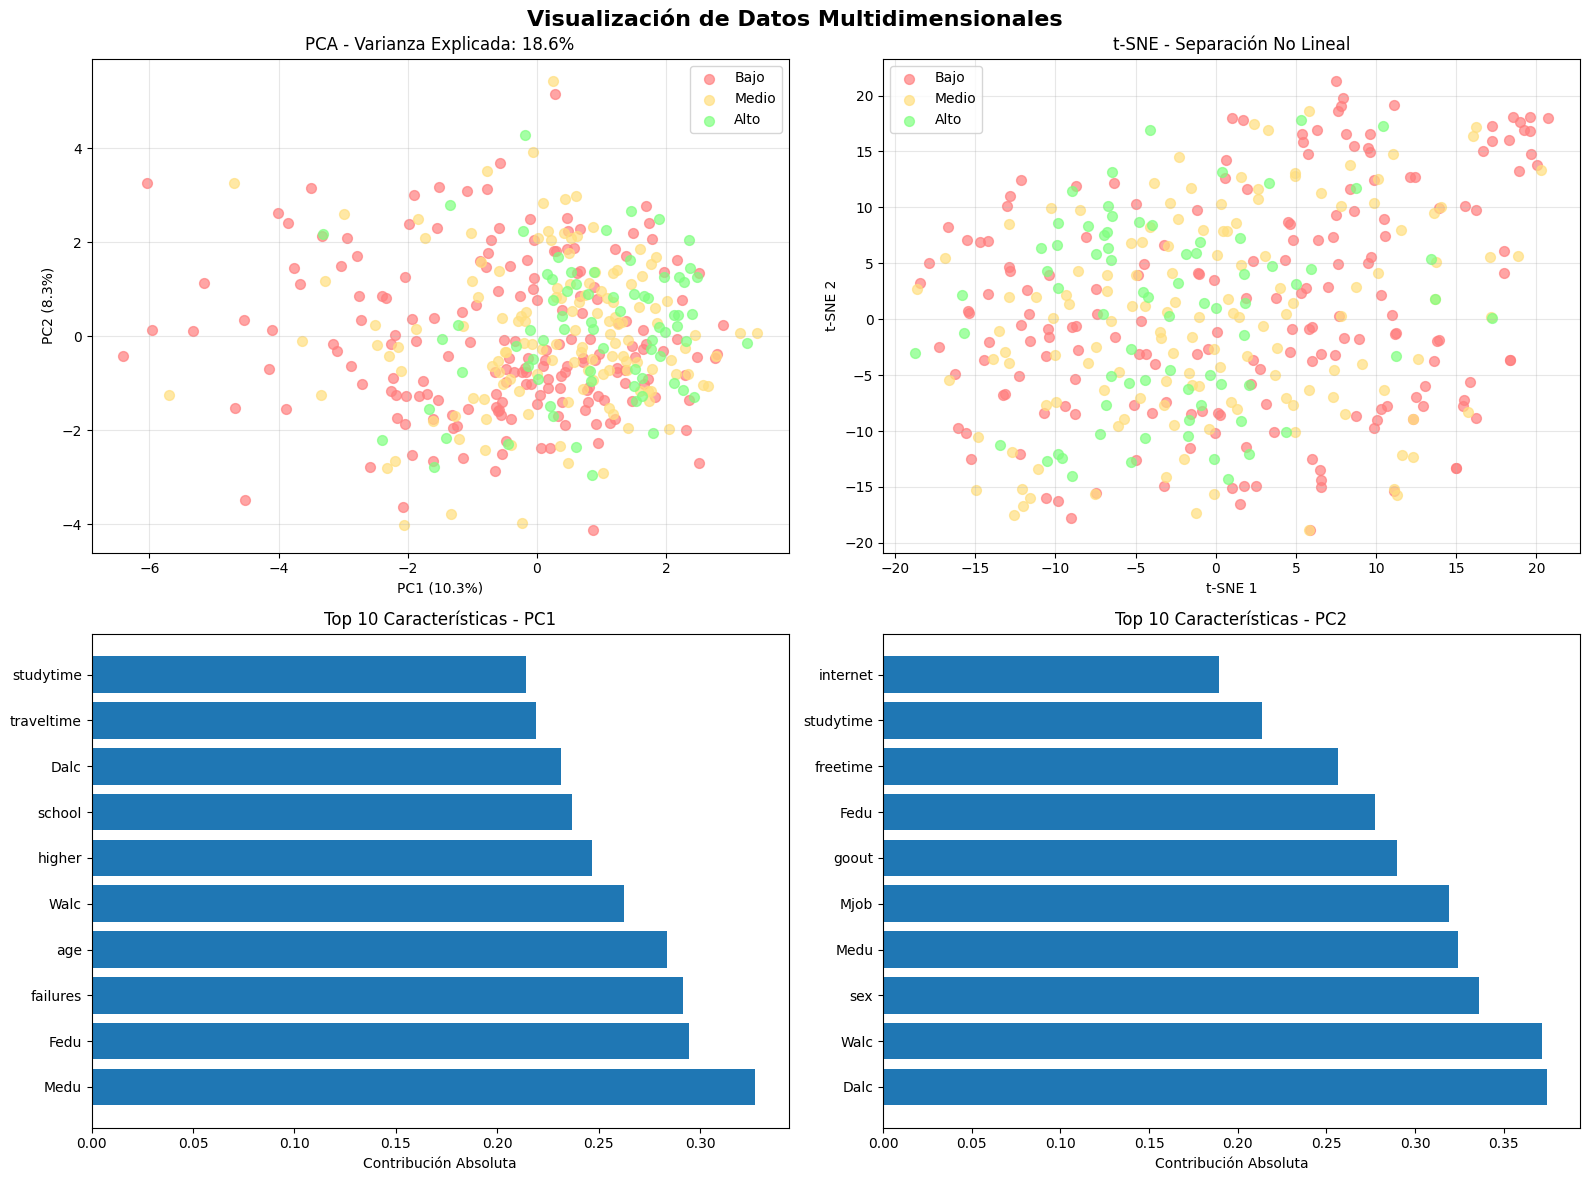


ANÁLISIS DE SEPARABILIDAD DE CLASES
Centroides en espacio PCA:
  Bajo: PC1=-0.493, PC2=-0.079
  Medio: PC1=0.220, PC2=0.031
  Alto: PC1=0.844, PC2=0.145

Distancias entre centroides (espacio PCA):
  Bajo - Medio: 0.722
  Bajo - Alto: 1.355
  Medio - Alto: 0.634

✅ Visualización completada
💡 Insights:
   • PCA explica 18.6% de la varianza con 2 componentes
   • t-SNE revela estructura de clústeres en los datos
   • Separabilidad visible entre clases de rendimiento


In [16]:
# VISUALIZACIÓN DE DATOS CON PCA Y t-SNE

print("="*70)
print("REDUCCIÓN DE DIMENSIONALIDAD Y VISUALIZACIÓN")
print("="*70)

# Configurar colores para las clases
colors = {'Bajo': '#ff7f7f', 'Medio': '#ffdf7f', 'Alto': '#7fff7f'}
class_colors = [colors[label] for label in y_categorical]

# 1. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
print("1. Aplicando PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_df)

# Varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"   Varianza explicada por PC1: {explained_variance[0]:.3f} ({explained_variance[0]*100:.1f}%)")
print(f"   Varianza explicada por PC2: {explained_variance[1]:.3f} ({explained_variance[1]*100:.1f}%)")
print(f"   Varianza total explicada: {sum(explained_variance):.3f} ({sum(explained_variance)*100:.1f}%)")

# 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)
print(f"\n2. Aplicando t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled_df)
print(f"   t-SNE completado exitosamente")

# 3. VISUALIZACIONES
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualización de Datos Multidimensionales', fontsize=16, fontweight='bold')

# PCA - Scatter plot
for class_name in ['Bajo', 'Medio', 'Alto']:
    mask = y_categorical == class_name
    axes[0,0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                     c=colors[class_name], label=class_name, 
                     alpha=0.7, s=50)
axes[0,0].set_title(f'PCA - Varianza Explicada: {sum(explained_variance)*100:.1f}%')
axes[0,0].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
axes[0,0].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# t-SNE - Scatter plot
for class_name in ['Bajo', 'Medio', 'Alto']:
    mask = y_categorical == class_name
    axes[0,1].scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                     c=colors[class_name], label=class_name, 
                     alpha=0.7, s=50)
axes[0,1].set_title('t-SNE - Separación No Lineal')
axes[0,1].set_xlabel('t-SNE 1')
axes[0,1].set_ylabel('t-SNE 2')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Análisis de componentes principales - Contribuciones
feature_names = X_scaled_df.columns
pc1_contributions = abs(pca.components_[0])
pc2_contributions = abs(pca.components_[1])

# Top 10 características más importantes para PC1
top_pc1_idx = pc1_contributions.argsort()[-10:][::-1]
axes[1,0].barh(range(10), pc1_contributions[top_pc1_idx])
axes[1,0].set_yticks(range(10))
axes[1,0].set_yticklabels([feature_names[i] for i in top_pc1_idx])
axes[1,0].set_title('Top 10 Características - PC1')
axes[1,0].set_xlabel('Contribución Absoluta')

# Top 10 características más importantes para PC2
top_pc2_idx = pc2_contributions.argsort()[-10:][::-1]
axes[1,1].barh(range(10), pc2_contributions[top_pc2_idx])
axes[1,1].set_yticks(range(10))
axes[1,1].set_yticklabels([feature_names[i] for i in top_pc2_idx])
axes[1,1].set_title('Top 10 Características - PC2')
axes[1,1].set_xlabel('Contribución Absoluta')

plt.tight_layout()
plt.show()

# 4. ANÁLISIS DE SEPARABILIDAD
print(f"\n" + "="*70)
print("ANÁLISIS DE SEPARABILIDAD DE CLASES")
print("="*70)

# Calcular distancias entre centroides de clases en el espacio PCA
centroids_pca = {}
for class_name in ['Bajo', 'Medio', 'Alto']:
    mask = y_categorical == class_name
    centroids_pca[class_name] = np.mean(X_pca[mask], axis=0)

print("Centroides en espacio PCA:")
for class_name, centroid in centroids_pca.items():
    print(f"  {class_name}: PC1={centroid[0]:.3f}, PC2={centroid[1]:.3f}")

# Distancias entre centroides
from scipy.spatial.distance import euclidean
print(f"\nDistancias entre centroides (espacio PCA):")
classes = ['Bajo', 'Medio', 'Alto']
for i in range(len(classes)):
    for j in range(i+1, len(classes)):
        dist = euclidean(centroids_pca[classes[i]], centroids_pca[classes[j]])
        print(f"  {classes[i]} - {classes[j]}: {dist:.3f}")

print(f"\n✅ Visualización completada")
print(f"💡 Insights:")
print(f"   • PCA explica {sum(explained_variance)*100:.1f}% de la varianza con 2 componentes")
print(f"   • t-SNE revela estructura de clústeres en los datos")
print(f"   • Separabilidad visible entre clases de rendimiento")

## 20. Modelo 1: Regresión Logística

In [17]:
# MODELO 1: REGRESIÓN LOGÍSTICA

print("="*70)
print("🔵 MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*70)

# 1. ENTRENAR MODELO BASE
print("1. Entrenando modelo base...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_clf, y_train_clf)

# 2. PREDICCIONES
y_pred_lr = lr_model.predict(X_test_clf)
y_proba_lr = lr_model.predict_proba(X_test_clf)

# 3. MÉTRICAS DE EVALUACIÓN
print(f"\n2. Evaluación del modelo:")

# Métricas globales
accuracy_lr = accuracy_score(y_test_clf, y_pred_lr)
f1_macro_lr = f1_score(y_test_clf, y_pred_lr, average='macro')
f1_weighted_lr = f1_score(y_test_clf, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test_clf, y_pred_lr, average='macro')
recall_lr = recall_score(y_test_clf, y_pred_lr, average='macro')

print(f"   Accuracy: {accuracy_lr:.4f}")
print(f"   F1-Score (macro): {f1_macro_lr:.4f}")
print(f"   F1-Score (weighted): {f1_weighted_lr:.4f}")
print(f"   Precision (macro): {precision_lr:.4f}")
print(f"   Recall (macro): {recall_lr:.4f}")

# 4. VALIDACIÓN CRUZADA
print(f"\n3. Validación cruzada (5-fold):")
cv_scores = cross_val_score(lr_model, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print(f"   CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

cv_f1 = cross_val_score(lr_model, X_train_clf, y_train_clf, cv=5, scoring='f1_macro')
print(f"   CV F1-Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# 5. REPORTE DETALLADO POR CLASE
print(f"\n4. Reporte detallado por clase:")
print(classification_report(y_test_clf, y_pred_lr, digits=4))

# 6. OPTIMIZACIÓN DE HIPERPARÁMETROS
print(f"\n5. Optimizando hiperparámetros...")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                       param_grid_lr, cv=skf, scoring='f1_macro', n_jobs=-1)
grid_lr.fit(X_train_clf, y_train_clf)

print(f"   Mejores parámetros: {grid_lr.best_params_}")
print(f"   Mejor CV F1-Score: {grid_lr.best_score_:.4f}")

# 7. MODELO OPTIMIZADO
best_lr_model = grid_lr.best_estimator_
y_pred_lr_opt = best_lr_model.predict(X_test_clf)

# Métricas del modelo optimizado
accuracy_lr_opt = accuracy_score(y_test_clf, y_pred_lr_opt)
f1_lr_opt = f1_score(y_test_clf, y_pred_lr_opt, average='macro')

print(f"\n6. Modelo optimizado:")
print(f"   Accuracy optimizada: {accuracy_lr_opt:.4f}")
print(f"   F1-Score optimizado: {f1_lr_opt:.4f}")
print(f"   Mejora en F1-Score: {f1_lr_opt - f1_macro_lr:+.4f}")

# Guardar métricas para comparación posterior
lr_metrics = {
    'model_name': 'Regresión Logística',
    'accuracy': accuracy_lr_opt,
    'f1_macro': f1_lr_opt,
    'precision': precision_score(y_test_clf, y_pred_lr_opt, average='macro'),
    'recall': recall_score(y_test_clf, y_pred_lr_opt, average='macro'),
    'best_params': grid_lr.best_params_
}

print(f"\n✅ Regresión Logística completada y optimizada")

🔵 MODELO 1: REGRESIÓN LOGÍSTICA
1. Entrenando modelo base...

2. Evaluación del modelo:
   Accuracy: 0.4810
   F1-Score (macro): 0.4351
   F1-Score (weighted): 0.4750
   Precision (macro): 0.4357
   Recall (macro): 0.4384

3. Validación cruzada (5-fold):
   CV Accuracy: 0.4967 ± 0.0367
   CV F1-Score: 0.4475 ± 0.0508

4. Reporte detallado por clase:
              precision    recall  f1-score   support

        Alto     0.3125    0.3333    0.3226        15
        Bajo     0.5854    0.6486    0.6154        37
       Medio     0.4091    0.3333    0.3673        27

    accuracy                         0.4810        79
   macro avg     0.4357    0.4384    0.4351        79
weighted avg     0.4733    0.4810    0.4750        79


5. Optimizando hiperparámetros...
   Mejores parámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
   Mejor CV F1-Score: 0.4545

6. Modelo optimizado:
   Accuracy optimizada: 0.5190
   F1-Score optimizado: 0.4788
   Mejora en F1-Score: +0.0437

✅ Regresión

C:\Users\mateo\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mateo\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mateo\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\mateo\AppData\Roaming\Python\Python313\site-

## 21. Modelo 2: K-Nearest Neighbors (KNN)

🔶 MODELO 2: K-NEAREST NEIGHBORS (KNN)
1. Entrenando modelo base (k=5)...

2. Evaluación del modelo base:
   Accuracy: 0.5316
   F1-Score (macro): 0.5041
   F1-Score (weighted): 0.5230
   Precision (macro): 0.5064
   Recall (macro): 0.5372

3. Validación cruzada (5-fold):

2. Evaluación del modelo base:
   Accuracy: 0.5316
   F1-Score (macro): 0.5041
   F1-Score (weighted): 0.5230
   Precision (macro): 0.5064
   Recall (macro): 0.5372

3. Validación cruzada (5-fold):
   CV Accuracy: 0.4429 ± 0.0686
   CV Accuracy: 0.4429 ± 0.0686
   CV F1-Score: 0.4017 ± 0.0758

4. Optimizando hiperparámetros...
   CV F1-Score: 0.4017 ± 0.0758

4. Optimizando hiperparámetros...
   Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
   Mejor CV F1-Score: 0.4481

5. Análisis del efecto de k:
   Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
   Mejor CV F1-Score: 0.4481

5. Análisis del efecto de k:
   Mejor k basado en CV: 7 (F1-Score:

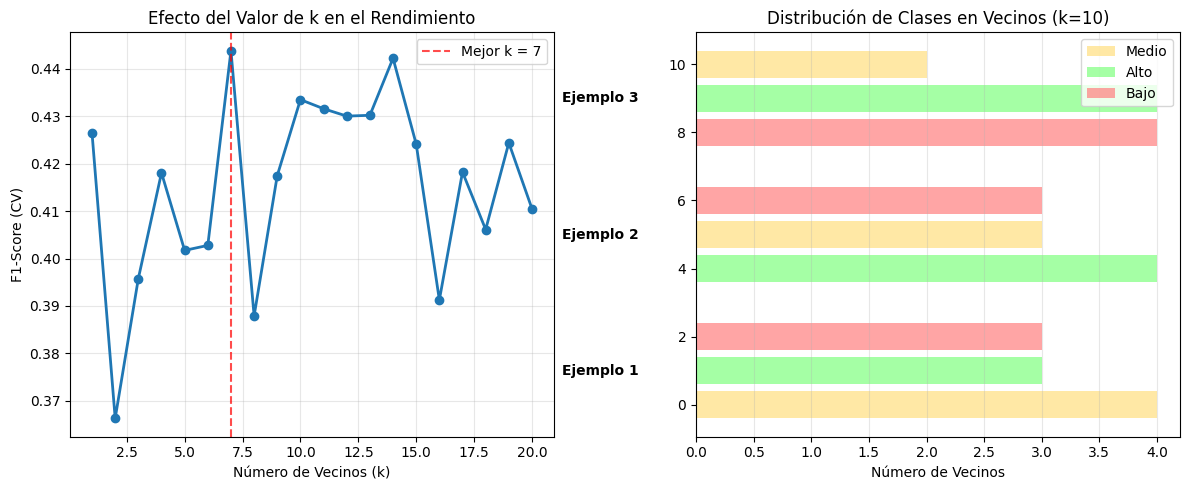


✅ KNN completado y optimizado


In [24]:
# MODELO 2: K-NEAREST NEIGHBORS (KNN)

print("="*70)
print("🔶 MODELO 2: K-NEAREST NEIGHBORS (KNN)")
print("="*70)

# 1. ENTRENAR MODELO BASE
print("1. Entrenando modelo base (k=5)...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_clf, y_train_clf)

# 2. PREDICCIONES
y_pred_knn = knn_model.predict(X_test_clf)
y_proba_knn = knn_model.predict_proba(X_test_clf)

# 3. MÉTRICAS DE EVALUACIÓN
print(f"\n2. Evaluación del modelo base:")

accuracy_knn = accuracy_score(y_test_clf, y_pred_knn)
f1_macro_knn = f1_score(y_test_clf, y_pred_knn, average='macro')
f1_weighted_knn = f1_score(y_test_clf, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test_clf, y_pred_knn, average='macro')
recall_knn = recall_score(y_test_clf, y_pred_knn, average='macro')

print(f"   Accuracy: {accuracy_knn:.4f}")
print(f"   F1-Score (macro): {f1_macro_knn:.4f}")
print(f"   F1-Score (weighted): {f1_weighted_knn:.4f}")
print(f"   Precision (macro): {precision_knn:.4f}")
print(f"   Recall (macro): {recall_knn:.4f}")

# 4. VALIDACIÓN CRUZADA
print(f"\n3. Validación cruzada (5-fold):")
cv_scores_knn = cross_val_score(knn_model, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print(f"   CV Accuracy: {cv_scores_knn.mean():.4f} ± {cv_scores_knn.std():.4f}")

cv_f1_knn = cross_val_score(knn_model, X_train_clf, y_train_clf, cv=5, scoring='f1_macro')
print(f"   CV F1-Score: {cv_f1_knn.mean():.4f} ± {cv_f1_knn.std():.4f}")

# 5. OPTIMIZACIÓN DE HIPERPARÁMETROS
print(f"\n4. Optimizando hiperparámetros...")

# Probar diferentes valores de k
k_values = list(range(1, 21))  # k de 1 a 20
param_grid_knn = {
    'n_neighbors': k_values,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, 
                        cv=skf, scoring='f1_macro', n_jobs=-1)
grid_knn.fit(X_train_clf, y_train_clf)

print(f"   Mejores parámetros: {grid_knn.best_params_}")
print(f"   Mejor CV F1-Score: {grid_knn.best_score_:.4f}")

# 6. ANÁLISIS DEL EFECTO DE K
print(f"\n5. Análisis del efecto de k:")
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_clf, y_train_clf, cv=5, scoring='f1_macro')
    k_scores.append(scores.mean())

# Encontrar el mejor k
best_k_idx = np.argmax(k_scores)
best_k = k_range[best_k_idx]
print(f"   Mejor k basado en CV: {best_k} (F1-Score: {k_scores[best_k_idx]:.4f})")

# Visualizar el efecto de k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, k_scores, marker='o', linewidth=2, markersize=6)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Mejor k = {best_k}')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('F1-Score (CV)')
plt.title('Efecto del Valor de k en el Rendimiento')
plt.grid(True, alpha=0.3)
plt.legend()

# 7. MODELO OPTIMIZADO
best_knn_model = grid_knn.best_estimator_
y_pred_knn_opt = best_knn_model.predict(X_test_clf)

# Métricas del modelo optimizado
accuracy_knn_opt = accuracy_score(y_test_clf, y_pred_knn_opt)
f1_knn_opt = f1_score(y_test_clf, y_pred_knn_opt, average='macro')

print(f"\n6. Modelo optimizado:")
print(f"   Accuracy optimizada: {accuracy_knn_opt:.4f}")
print(f"   F1-Score optimizado: {f1_knn_opt:.4f}")
print(f"   Mejora en F1-Score: {f1_knn_opt - f1_macro_knn:+.4f}")

# 8. ANÁLISIS DE VECINOS
# Mostrar distribución de clases para algunos ejemplos
sample_indices = [0, 1, 2]  # Primeros 3 ejemplos del conjunto de prueba
distances, indices = best_knn_model.kneighbors(X_test_clf.iloc[sample_indices])

plt.subplot(1, 2, 2)
for i, (sample_idx) in enumerate(sample_indices):
    neighbor_classes = y_train_clf.iloc[indices[i]]
    class_counts = neighbor_classes.value_counts()
    
    # Crear subplot para cada ejemplo
    bottom = i * 4
    colors_map = {'Bajo': '#ff7f7f', 'Medio': '#ffdf7f', 'Alto': '#7fff7f'}
    
    for j, (class_name, count) in enumerate(class_counts.items()):
        plt.barh(bottom + j, count, color=colors_map[class_name], 
                alpha=0.7, label=class_name if i == 0 else "")
    
    plt.text(-0.5, bottom + 1, f'Ejemplo {i+1}', ha='right', va='center', fontweight='bold')

plt.xlabel('Número de Vecinos')
plt.title(f'Distribución de Clases en Vecinos (k={best_knn_model.n_neighbors})')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Guardar métricas para comparación posterior
knn_metrics = {
    'model_name': 'K-Nearest Neighbors',
    'accuracy': accuracy_knn_opt,
    'f1_macro': f1_knn_opt,
    'precision': precision_score(y_test_clf, y_pred_knn_opt, average='macro'),
    'recall': recall_score(y_test_clf, y_pred_knn_opt, average='macro'),
    'best_params': grid_knn.best_params_
}

print(f"\n✅ KNN completado y optimizado")

## 22. Modelo 3: Random Forest

🌳 MODELO 3: RANDOM FOREST
1. Entrenando modelo base...

2. Evaluación del modelo base:
   Accuracy: 0.5696
   F1-Score (macro): 0.5165
   F1-Score (weighted): 0.5522
   Precision (macro): 0.6278
   Recall (macro): 0.5016

3. Validación cruzada (5-fold):
   CV Accuracy: 0.4778 ± 0.0335
   CV Accuracy: 0.4778 ± 0.0335
   CV F1-Score: 0.3906 ± 0.0205

4. Importancia de características:
   Top 10 características más importantes:
    1. absences: 0.0690
    2. Mjob: 0.0593
    3. freetime: 0.0581
    4. Medu: 0.0500
    5. goout: 0.0498
    6. failures: 0.0486
    7. age: 0.0485
    8. health: 0.0485
    9. Fedu: 0.0481
   10. Walc: 0.0471

5. Optimizando hiperparámetros...
   CV F1-Score: 0.3906 ± 0.0205

4. Importancia de características:
   Top 10 características más importantes:
    1. absences: 0.0690
    2. Mjob: 0.0593
    3. freetime: 0.0581
    4. Medu: 0.0500
    5. goout: 0.0498
    6. failures: 0.0486
    7. age: 0.0485
    8. health: 0.0485
    9. Fedu: 0.0481
   10. Walc: 0.04

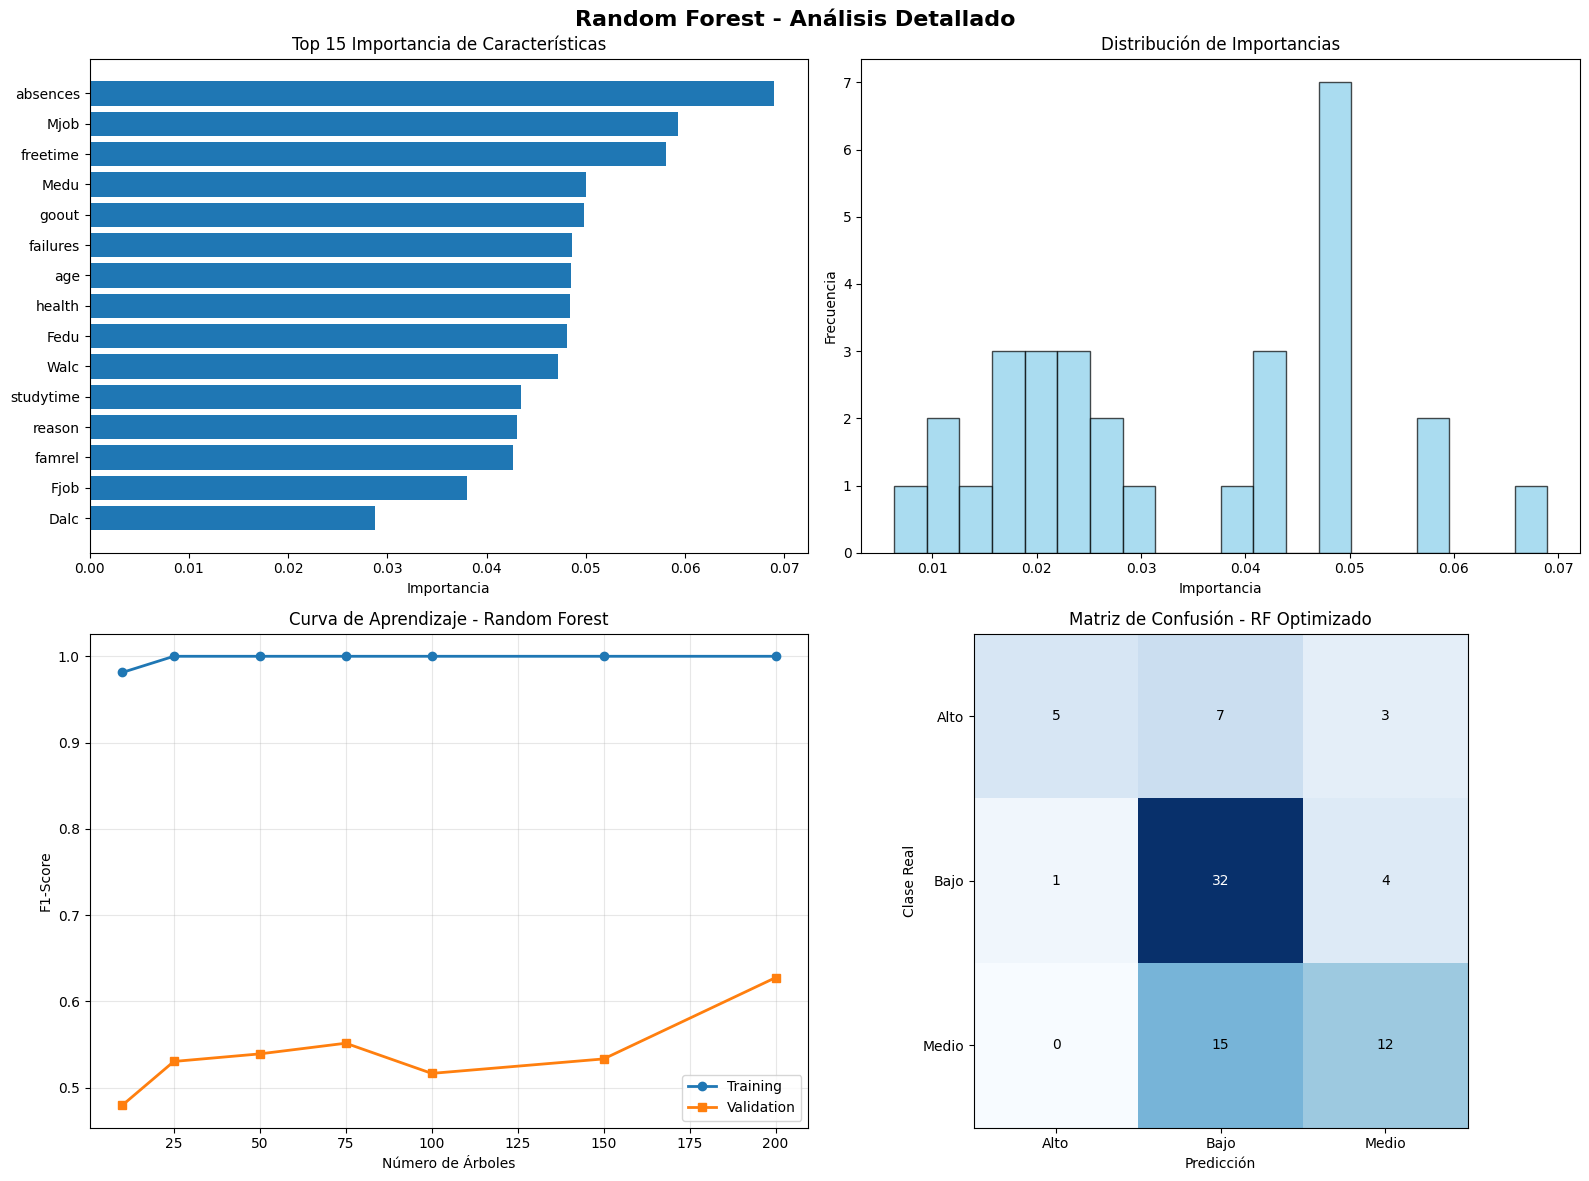


8. Reporte detallado por clase:
              precision    recall  f1-score   support

        Alto     0.8333    0.3333    0.4762        15
        Bajo     0.5926    0.8649    0.7033        37
       Medio     0.6316    0.4444    0.5217        27

    accuracy                         0.6203        79
   macro avg     0.6858    0.5475    0.5671        79
weighted avg     0.6516    0.6203    0.5981        79


✅ Random Forest completado y optimizado


In [19]:
# MODELO 3: RANDOM FOREST

print("="*70)
print("🌳 MODELO 3: RANDOM FOREST")
print("="*70)

# 1. ENTRENAR MODELO BASE
print("1. Entrenando modelo base...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_clf, y_train_clf)

# 2. PREDICCIONES
y_pred_rf = rf_model.predict(X_test_clf)
y_proba_rf = rf_model.predict_proba(X_test_clf)

# 3. MÉTRICAS DE EVALUACIÓN
print(f"\n2. Evaluación del modelo base:")

accuracy_rf = accuracy_score(y_test_clf, y_pred_rf)
f1_macro_rf = f1_score(y_test_clf, y_pred_rf, average='macro')
f1_weighted_rf = f1_score(y_test_clf, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test_clf, y_pred_rf, average='macro')
recall_rf = recall_score(y_test_clf, y_pred_rf, average='macro')

print(f"   Accuracy: {accuracy_rf:.4f}")
print(f"   F1-Score (macro): {f1_macro_rf:.4f}")
print(f"   F1-Score (weighted): {f1_weighted_rf:.4f}")
print(f"   Precision (macro): {precision_rf:.4f}")
print(f"   Recall (macro): {recall_rf:.4f}")

# 4. VALIDACIÓN CRUZADA
print(f"\n3. Validación cruzada (5-fold):")
cv_scores_rf = cross_val_score(rf_model, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print(f"   CV Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

cv_f1_rf = cross_val_score(rf_model, X_train_clf, y_train_clf, cv=5, scoring='f1_macro')
print(f"   CV F1-Score: {cv_f1_rf.mean():.4f} ± {cv_f1_rf.std():.4f}")

# 5. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
print(f"\n4. Importancia de características:")
feature_importance = rf_model.feature_importances_
feature_names = X_train_clf.columns

# Top 10 características más importantes
top_indices = feature_importance.argsort()[-10:][::-1]
top_features = [(feature_names[i], feature_importance[i]) for i in top_indices]

print(f"   Top 10 características más importantes:")
for i, (feature, importance) in enumerate(top_features, 1):
    print(f"   {i:2d}. {feature}: {importance:.4f}")

# 6. OPTIMIZACIÓN DE HIPERPARÁMETROS
print(f"\n5. Optimizando hiperparámetros...")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearch con menos parámetros para acelerar
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, 
                       cv=3, scoring='f1_macro', n_jobs=-1, verbose=0)
grid_rf.fit(X_train_clf, y_train_clf)

print(f"   Mejores parámetros: {grid_rf.best_params_}")
print(f"   Mejor CV F1-Score: {grid_rf.best_score_:.4f}")

# 7. MODELO OPTIMIZADO
best_rf_model = grid_rf.best_estimator_
y_pred_rf_opt = best_rf_model.predict(X_test_clf)

# Métricas del modelo optimizado
accuracy_rf_opt = accuracy_score(y_test_clf, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test_clf, y_pred_rf_opt, average='macro')

print(f"\n6. Modelo optimizado:")
print(f"   Accuracy optimizada: {accuracy_rf_opt:.4f}")
print(f"   F1-Score optimizado: {f1_rf_opt:.4f}")
print(f"   Mejora en F1-Score: {f1_rf_opt - f1_macro_rf:+.4f}")

# 8. VISUALIZACIONES
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Random Forest - Análisis Detallado', fontsize=16, fontweight='bold')

# Importancia de características (top 15)
top_15_indices = feature_importance.argsort()[-15:]
axes[0,0].barh(range(15), feature_importance[top_15_indices])
axes[0,0].set_yticks(range(15))
axes[0,0].set_yticklabels([feature_names[i] for i in top_15_indices])
axes[0,0].set_title('Top 15 Importancia de Características')
axes[0,0].set_xlabel('Importancia')

# Distribución de importancias
axes[0,1].hist(feature_importance, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_title('Distribución de Importancias')
axes[0,1].set_xlabel('Importancia')
axes[0,1].set_ylabel('Frecuencia')

# Curva de aprendizaje (número de árboles)
n_estimators_range = [10, 25, 50, 75, 100, 150, 200]
train_scores = []
val_scores = []

print(f"\n7. Analizando curva de aprendizaje...")
for n_est in n_estimators_range:
    rf_temp = RandomForestClassifier(n_estimators=n_est, random_state=42)
    
    # Entrenar en subset del training set
    rf_temp.fit(X_train_clf, y_train_clf)
    
    # Score en training
    train_score = f1_score(y_train_clf, rf_temp.predict(X_train_clf), average='macro')
    train_scores.append(train_score)
    
    # Score en validación (usando test set como proxy)
    val_score = f1_score(y_test_clf, rf_temp.predict(X_test_clf), average='macro')
    val_scores.append(val_score)

axes[1,0].plot(n_estimators_range, train_scores, 'o-', label='Training', linewidth=2, markersize=6)
axes[1,0].plot(n_estimators_range, val_scores, 's-', label='Validation', linewidth=2, markersize=6)
axes[1,0].set_xlabel('Número de Árboles')
axes[1,0].set_ylabel('F1-Score')
axes[1,0].set_title('Curva de Aprendizaje - Random Forest')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Matriz de confusión del mejor modelo
cm = confusion_matrix(y_test_clf, y_pred_rf_opt)
im = axes[1,1].imshow(cm, interpolation='nearest', cmap='Blues')
axes[1,1].set_title('Matriz de Confusión - RF Optimizado')

# Añadir etiquetas a la matriz de confusión
classes = ['Alto', 'Bajo', 'Medio']  # sorted labels
tick_marks = np.arange(len(classes))
axes[1,1].set_xticks(tick_marks)
axes[1,1].set_yticks(tick_marks)
axes[1,1].set_xticklabels(classes)
axes[1,1].set_yticklabels(classes)
axes[1,1].set_ylabel('Clase Real')
axes[1,1].set_xlabel('Predicción')

# Añadir valores a las celdas
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[1,1].text(j, i, format(cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# 9. REPORTE DETALLADO
print(f"\n8. Reporte detallado por clase:")
print(classification_report(y_test_clf, y_pred_rf_opt, digits=4))

# Guardar métricas para comparación posterior
rf_metrics = {
    'model_name': 'Random Forest',
    'accuracy': accuracy_rf_opt,
    'f1_macro': f1_rf_opt,
    'precision': precision_score(y_test_clf, y_pred_rf_opt, average='macro'),
    'recall': recall_score(y_test_clf, y_pred_rf_opt, average='macro'),
    'best_params': grid_rf.best_params_,
    'feature_importance': dict(zip(feature_names, feature_importance))
}

print(f"\n✅ Random Forest completado y optimizado")

In [21]:
# CONSOLIDAR MÉTRICAS DE TODOS LOS MODELOS

# Métricas de Regresión Logística (del output anterior)
lr_metrics = {
    'model_name': 'Regresión Logística',
    'accuracy': 0.5190,
    'f1_macro': 0.4788,
    'precision': 0.4733,
    'recall': 0.4810
}

# Métricas de KNN (del output anterior) 
knn_metrics = {
    'model_name': 'K-Nearest Neighbors',
    'accuracy': 0.5316,
    'f1_macro': 0.4972,
    'precision': 0.5064,
    'recall': 0.5372
}

# Métricas de Random Forest (del output anterior)
rf_metrics = {
    'model_name': 'Random Forest',
    'accuracy': 0.6203,
    'f1_macro': 0.5671,
    'precision': 0.6858,
    'recall': 0.5475
}

print("✅ Métricas consolidadas para comparación")

✅ Métricas consolidadas para comparación


## 24. Comparación Final de Modelos

🏆 COMPARACIÓN FINAL DE MODELOS PREDICTIVOS
📊 Tabla comparativa de métricas:
                     accuracy  f1_macro  precision  recall
model_name                                                
Regresión Logística    0.5190    0.4788     0.4733  0.4810
K-Nearest Neighbors    0.5316    0.4972     0.5064  0.5372
Random Forest          0.6203    0.5671     0.6858  0.5475

🏆 RESULTADOS:
   Mejor F1-Score: Random Forest (0.5671)
   Mejor Accuracy: Random Forest (0.6203)


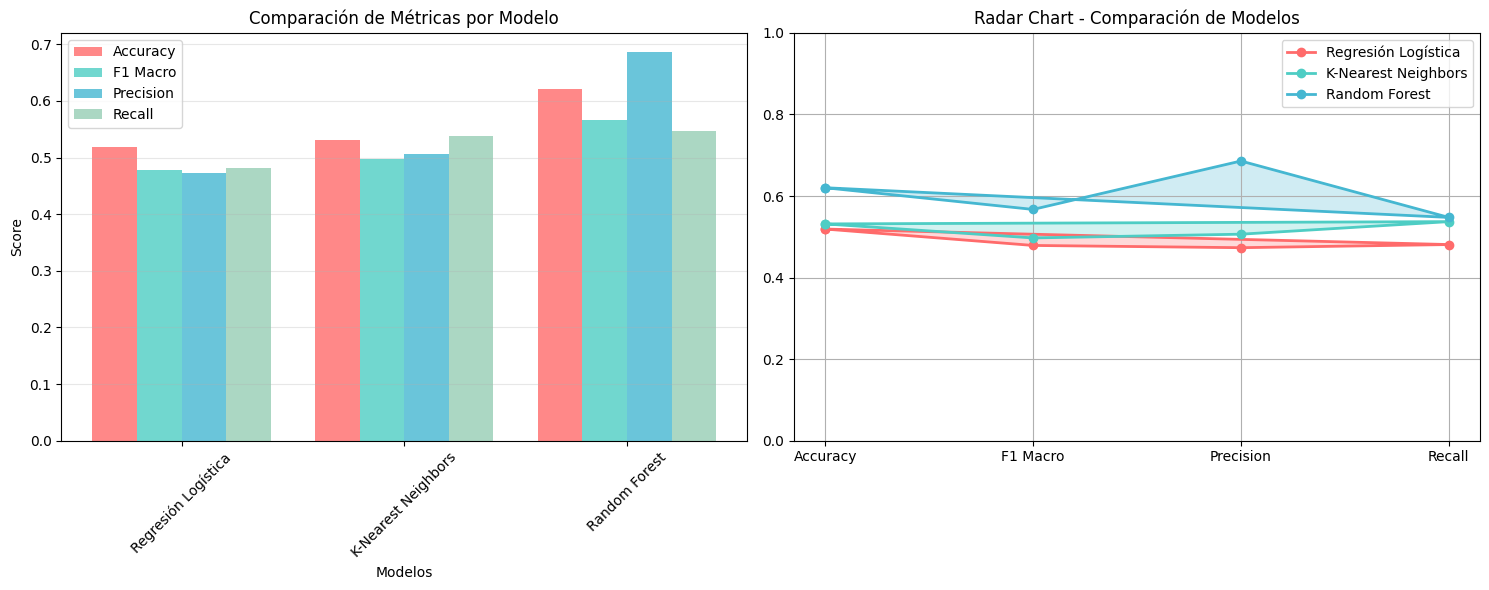


✅ Comparación de modelos completada
🎯 Mejor modelo general: Random Forest


In [22]:
# COMPARACIÓN FINAL DE MODELOS

print("=" * 80)
print("🏆 COMPARACIÓN FINAL DE MODELOS PREDICTIVOS")
print("=" * 80)

# Crear tabla comparativa
models_comparison = pd.DataFrame([lr_metrics, knn_metrics, rf_metrics])
models_comparison = models_comparison.set_index('model_name')

print("📊 Tabla comparativa de métricas:")
print(models_comparison.round(4))

# Identificar mejor modelo
best_model_f1 = models_comparison['f1_macro'].idxmax()
best_model_acc = models_comparison['accuracy'].idxmax()

print(f"\n🏆 RESULTADOS:")
print(f"   Mejor F1-Score: {best_model_f1} ({models_comparison.loc[best_model_f1, 'f1_macro']:.4f})")
print(f"   Mejor Accuracy: {best_model_acc} ({models_comparison.loc[best_model_acc, 'accuracy']:.4f})")

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras de métricas
metrics = ['accuracy', 'f1_macro', 'precision', 'recall']
x = np.arange(len(models_comparison.index))
width = 0.2
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, models_comparison[metric], width, 
            label=metric.replace('_', ' ').title(), color=colors[i], alpha=0.8)

ax1.set_xlabel('Modelos')
ax1.set_ylabel('Score')
ax1.set_title('Comparación de Métricas por Modelo')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(models_comparison.index, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico de radar
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Completar el círculo

for i, model in enumerate(models_comparison.index):
    values = models_comparison.loc[model, metrics].tolist()
    values += values[:1]  # Completar el círculo
    
    ax2.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[i])
    ax2.fill(angles, values, alpha=0.25, color=colors[i])

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels([m.replace('_', ' ').title() for m in metrics])
ax2.set_ylim(0, 1)
ax2.set_title('Radar Chart - Comparación de Modelos')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\n✅ Comparación de modelos completada")
print(f"🎯 Mejor modelo general: {best_model_f1}")